**В своей работе я ставила следующие задачи:**

1. Анализ:
- динамики ТВ рейтингов 2017-2020, 
- корреляции факторов и рейтингов (жанр программы, прайм-не прайм, время начала передачи, телеканал и т.д.)

2. Прогноз общих рейтингов (анализ временного ряда, прогноз общих рейтингов телесмотрения и рейтингов для конкретного телеканала). 

3. Прогноз рейтингов программ (многофакторный анализ (влияние времени выхода, жанра, месяц выходаа,телеканал и.т.д на рейтинг передач).

**Источник данных:**
Основные данные по телесмотрению за последних 3 года были взяты из официальной программы Palomars (TNS Gallup)

**На какие вопросы отвечает работа?**
Есть ли в данных сезонность?
С какими факторами взаимосвязаны рейтинги?
Какой алгоритм лучше всего (по метрикам качества) сможет строить прогноз и с какой ошибкой?
С какой точностью можно спрогнозировать рейтинги передач, исходя из различных признаков (в т.ч категориальных)?

**Какие методы используются и как измеряется качество?** 
1. Matplotlib для визуализации данных
2. Sklearn и Prophet (для прогнозирования общих рейтингов)
3. Catboost (для множественной регрессии с учетом категориальных признаков) (прогнозирование рейтингов передачи)
4. При прогнозировании основными показателями качества будут Mean Squared Error (MSE) и Mean Absolute Error (MAPE)


**Общая информация о данных**

**Данные для анализа**:

1. база TNS Gallup Media 

2. Россия 100+ (для городов с населением >100т. Так как база 0+ используется меньше года)

3. период с 1.09.17-2.09.20

4. только домашнее телесмотрение ("дача" не включается, так как мониторинг с дачей меньше года)

5. федеральная реклама

6. данные для дефолтной общей аудитории (Все 4+). Хотя для разных телеканалов расчетная баинговая аудитория для покупки рейтингов различаются. Но для сравнения лучше пользоваться единой. Принцип анализа идентичен.

7. за эфирное событие брала программы, а не рекламные блоки или ролики, чтобы посчитать "общий инвентарь". Так как данные по рекламным блокам больше подвержены различным факторам (законодательное время рекламы, фактическая продажа рекламы и т.д). 

8. основным показателем, который оценивает объем рынка (бюджета) -считаю стандартный приведенный рейтинг (St.TVR(20')), так как именно их продают телеканалы (с поправкой на аудиторию). Описание показателей см. ниже

**Описание основных показателей:**

'Название_передачи' - название передачи

'время_начала'      - время начала передачи (H:M:S)    

'время_окончания'   - время начала передачи (H:M:S)  

'День_недели'       - день недели

"День_тип'          - выходной/рабочий

"Дата'              - D:M:Y

"Телекомпания'      - не использую

'Телекомпания_оригинала' - использую

"Программа_жанр_'   - жанр программы (9 категорий) 

'Программа_категория' - более подробная классификация (65 категорий)

'Длительность'       - длительность (H:M:S) 

'TVR'   - Рейтинг передачи  (рекламного  блока,  временного  промежутка)  c  учетом  продолжительности просмотра  и  выражается  в  процентах  от  целевой  группы.  Рейтинг  представляет  собой  Audience, выраженный в % от целевой группы.Каждому  зрителю,  переключавшемуся  на  данный  канал  в  течение  данной  передачи  (рекламного блока,   временного   промежутка),   присваивается   определенный   вкладв   зависимости   от продолжительности  просмотра.  Так,  зрителю,  просмотревшему  всю  передачу  от  начала  до  конца присваивается  вклад1,  смотревшему  половину  передачи -0.5,  треть  передачи -0.3333  ит.д. Подсчитывается сумма вкладови делится на количество респондентов -членов целевой группы. Отражает ср.рейтинг события без учета времени события

'St.TVR(20`)'        - Данная   статистика   представляет   собой   TVR   события,   приведенный   к   некоторой «стандартной» длительности. Основное  назначение  новой  статистики –удобный  и  быстрый  подсчет  «покупаемых» (на данный момент, 20-секундных) рейтингов для группы событий. Рассчитывается как 
TVR события * Длительность события (сек) / стандартная Длительность (сек) (сейчас используется 20").
Отражает рейтинг с учетом длительности времени эфирного события

**Добавленные данные**:
'Час_начала'         - час от времени начала передачи  
'Длительность(сек)' -  длительность в секундах
'Прайм' =            - 1(прайм -выходные и будни с 18-23), 0 - остальные
"St. TVR" - st.TVR эфирного события (без приведения к стандарту). Расчитываем как TVR * длительность события (сек)
'Год' 
"Квартал","Квартал_год" - номер квартала и квартал с годом (для дианмических отчетов)
 Месяц" и "Месяц_год" - номер квартала и квартал с годом (для дианмических отчетов)
   

# **План работы**

1. Анализ данных
2. Преобразование таблицы для анализа
3. Анализ основных данных + анализ "хитов" (телеканалы,программы и т.д.)
4. Анализ динамики рейтингов (годовая, месячная,недельная...)
5. Прогнозирование рейтингов на основе модели prophet (построение общей модели+оптимизация модели)
6. Прогнозирование рейтингов на основе линейной регрессии (построение общей модели+оптимизация модели)
7. Сравнение прогнозных моделей по основным критериям ошибки. Построение прогноза на основе оптимальной модели
8. Анализ коррелирующих с рейтингами факторов (визуализация)
9. Построение множественной линейной регрессии для прогнозирования рейтингов передач на основе модели catboost (исходя из категориальных и некатегориальных факторов)


In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
pd.set_option('precision', 3)
from fbprophet import Prophet
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric


import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error as mse

In [2]:

from google.colab import drive
drive.mount('/content/mntDrive')


Mounted at /content/mntDrive


In [3]:

df1 = pd.read_excel("/content/mntDrive/My Drive/Анализ телесмотрения (данные)/Финальный_проект17-18.xlsx")
df2 = pd.read_excel("/content/mntDrive/My Drive/Анализ телесмотрения (данные)/Финальный_проект18-19.xlsx")
df3 = pd.read_excel("/content/mntDrive/My Drive/Анализ телесмотрения (данные)/Финальный_проект19-20.xlsx")

TVR_file = pd.concat([df1,df2,df3],ignore_index = True)
TVR_file.head()

#len(df1)+len(df2)+len(df3) == len(TVR_file)


,Программа,Программа время начала,Программа время окончания,День недели,День тип,Дата,Телекомпания,Телекомпания оригинала,Программа жанр,Программа категория,Длительность,Unnamed: 11,Stand. TVR (20),TVR
0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,nan,Stand. TVR (20),TVR
1,Мечта Ивана,05:00:00,06:29:53,Суббота,Выходной,2017-09-02,МАТЧ ТВ (СЕТЕВОЕ ВЕЩАНИЕ),МАТЧ ТВ (СЕТЕВОЕ ВЕЩАНИЕ),Кинопрограмма,Кинофильм,01:29:53,nan,14.02,0.05
2,Комеди Клаб,05:00:00,05:00:26,Суббота,Выходной,2017-09-02,ТНТ 4 (СЕТЕВОЕ ВЕЩАНИЕ),ТНТ 4 (СЕТЕВОЕ ВЕЩАНИЕ),Развлекательная программа,Юмористическая передача,00:00:26,nan,0.07,0.05
3,Как это работает,05:00:00,05:10:21,Суббота,Выходной,2017-09-02,DISCOVERY CHANNEL (ДО 31/12/2019) (СЕТЕВОЕ ВЕЩ...,DISCOVERY CHANNEL (ДО 31/12/2019) (СЕТЕВОЕ ВЕЩ...,Познавательная программа,Другая познавательная передача,00:10:21,nan,1.48,0.05
4,Наедине со всеми,05:00:00,06:00:04,Суббота,Выходной,2017-09-02,ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ),ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ),Развлекательная программа,Развлекательное ток-шоу,01:00:04,nan,33.71,0.19


Данные в таблице

---



In [4]:
TVR_file.head(5)
print("shape: ",TVR_file.shape,'\n') 
print("info: ",TVR_file.info(),'\n')
print("columns: ",TVR_file.columns)



shape:  (1602426, 14) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602426 entries, 0 to 1602425
Data columns (total 14 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Программа                  1602423 non-null  object        
 1   Программа время начала     1602423 non-null  object        
 2   Программа время окончания  1602423 non-null  object        
 3   День недели                1602423 non-null  object        
 4   День тип                   1602423 non-null  object        
 5   Дата                       1602423 non-null  datetime64[ns]
 6   Телекомпания               1602423 non-null  object        
 7   Телекомпания оригинала     1602423 non-null  object        
 8   Программа жанр             1602423 non-null  object        
 9   Программа категория        1602423 non-null  object        
 10  Длительность               1602423 non-null  object        
 11  Unnamed: 11  

Удаление дубликатов и проверка

In [5]:
TVR_file.duplicated().sum()

2765

In [6]:
TVR_file = TVR_file.drop_duplicates()
TVR_file.shape

(1599661, 14)

## **Преобразование таблицы**:
1. сортировка по дате
2. удаление нулевых данных
3. переименование столбцов
4. изменение формата данных на числовые и дата-время
5. добавление столбцов для дальнейшего анализа

In [7]:
TVR_file = TVR_file.sort_values(["Дата"])

In [8]:
TVR_file = TVR_file.dropna(axis=1,how="all")

TVR_file = TVR_file.dropna(axis=0,how="any")

# sum(TVR_file.isnull().sum())


In [9]:
TVR_file = TVR_file.rename(columns = {'Stand. TVR (20)' : "St.TVR(20`)","Дом":"St.TVR(20`)",'Программа время начала':"время начала",'Программа время окончания': "время окончания"})
TVR_file = TVR_file.rename(columns = lambda col: col.replace(" ","_"))


In [10]:
TVR_file["St.TVR(20`)"] = TVR_file["St.TVR(20`)"].astype(float)

TVR_file["TVR"] = TVR_file["TVR"].astype(float)


In [11]:
TVR_file["Длительность(сек)"] = TVR_file["Длительность"]
TVR_file["Длительность(сек)"] = pd.to_datetime(TVR_file["Длительность(сек)"].astype(str)).dt.hour*3600 +\
                                pd.to_datetime(TVR_file["Длительность(сек)"].astype(str)).dt.minute*60 +\
                                pd.to_datetime(TVR_file["Длительность(сек)"].astype(str)).dt.second

In [12]:
TVR_file["время_начала"]= pd.to_datetime(TVR_file["время_начала"].astype(str))
TVR_file["время_окончания"]= pd.to_datetime(TVR_file["время_окончания"].astype(str))
TVR_file["время_начала"] = TVR_file["время_начала"].dt.strftime("%H:%M:%S")
TVR_file["время_окончания"] = TVR_file["время_окончания"].dt.strftime("%H:%M:%S")



In [13]:
TVR_file["время_начала"]= pd.to_datetime(TVR_file["время_начала"].astype(str))
TVR_file["Час_начала"] = TVR_file["время_начала"].dt.hour.astype(int)



In [14]:
def prime_or_not(str):
  if str["День_тип"] == "Выходной" or 18<=str["Час_начала"]<=23:
    return 1
  else:
    return 0
TVR_file["Прайм"] = TVR_file.apply(prime_or_not,axis=1) 


In [15]:
TVR_file["St.TVR"] = TVR_file["St.TVR(20`)"] * 20 



In [16]:
TVR_file["Год"] = TVR_file["Дата"].dt.year


In [17]:
TVR_file["Месяц"] = TVR_file["Дата"].dt.month_name()

In [18]:
kvartal = [1,1,1,2,2,2,3,3,3,4,4,4]
month = ['January','February','March', 'April', 'May', 'June', 'July', 'August','September', 'October', 'November', 'December']
dict_month_kvartal = dict(zip(month,kvartal))

def month_to_kvartal(str):
    month_for = str["Месяц"]
    return dict_month_kvartal[month_for]
    
TVR_file["Квартал"] = TVR_file.apply(month_to_kvartal,axis=1)
#TVR_file

In [19]:
TVR_file["Месяц_номер"] = TVR_file["Дата"].dt.month.apply(lambda str:"{:2d}".format(str))
TVR_file["Месяц_год"] = TVR_file["Год"].astype(str) + "." + TVR_file["Месяц_номер"].astype(str) 
TVR_file["Квартал_год"] = TVR_file["Год"].astype(str) + "." + TVR_file["Квартал"].astype(str) 

Смотрим основные показатели данных (средние, медианы....)

In [20]:
TVR_file.describe()



,St.TVR(20`),TVR,Длительность(сек),Час_начала,Прайм,St.TVR,Год,Квартал
count,1599660.00,1599660.00,1599660.00,1599660.00,1599660.00,1599660.00,1599660.00,1599660.00
mean,37.74,0.33,2128.61,10.87,0.41,754.82,2018.69,2.51
std,115.69,0.53,3259.61,6.49,0.49,2313.75,0.94,1.11
min,0.00,0.00,1.00,0.00,0.00,0.00,2017.00,1.00
25%,1.07,0.05,334.00,6.00,0.00,21.40,2018.00,2.00
50%,6.29,0.15,1389.00,10.00,0.00,125.80,2019.00,3.00
75%,25.81,0.36,2744.00,16.00,1.00,516.20,2019.00,4.00
max,12251.00,20.17,32400.00,23.00,1.00,245020.00,2020.00,4.00


Как мы видим, показатели по рейтингам имеют большие отклонения. Нужно будет обратить внимание на выбросы.

## **Таблица хитов**:
1. Хиты программы по среднему и суммарному рейтингу
2. Хиты-телеканалы + проверка паретто-эффективности (20% дают 80% результата)
3. Хиты-жанры + проверка паретто-эффективности (20% дают 80% результата)

**Хиты-передачи**

По TVR (без учета длительности программы)

In [21]:
TVR_file_tvr_hits = TVR_file.sort_values(["TVR"], ascending = False)
TVR_file_tvr_hits_10 = TVR_file_tvr_hits[["St.TVR(20`)","TVR","Программа","Телекомпания","Дата","Длительность"]].iloc[0:10]
TVR_file_tvr_hits_10 


,St.TVR(20`),TVR,Программа,Телекомпания,Дата,Длительность
432603,12251.00,20.17,Футбол. Чемпионат Мира 2018 (live),ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ),2018-07-07,03:22:28
423632,10659.39,18.60,Футбол. Чемпионат Мира 2018 (live),РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ),2018-07-01,03:11:02
443866,8324.74,16.22,Футбол. Чемпионат Мира 2018 (live),РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ),2018-07-15,02:51:03
406323,6580.73,15.78,Футбол. Чемпионат Мира 2018 (live),РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ),2018-06-19,02:19:02
165734,400.86,15.07,Новогоднее обращение Президента России Владими...,ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ),2017-12-31,00:08:52
692828,395.51,14.54,Новогоднее обращение Президента России Владими...,ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ),2018-12-31,00:09:04
1233231,376.22,14.12,Новогоднее обращение Президента России Владими...,ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ),2019-12-31,00:08:53
398951,5265.71,14.05,Футбол. Чемпионат Мира 2018 (live),ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ),2018-06-14,02:04:54
244208,3822.70,12.79,XXIII зимние Олимпийские игры. Хоккей,ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ),2018-02-25,01:39:37
165724,333.67,12.54,Новогоднее обращение Президента России Владими...,РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ),2017-12-31,00:08:52


Ожидаемо самыми рейтинговыми передачами оказалось Новогоднее обращение и Футбол. Также попало несколько других телепередач.


По St.TVR(20`) ( с учетом длительности передач)

In [22]:
TVR_file_st_hits = TVR_file.sort_values(["St.TVR(20`)"], ascending = False)
TVR_file_st_hits_10 = TVR_file_st_hits[["St.TVR(20`)","TVR","Программа","Телекомпания","Дата","Длительность"]].iloc[0:10]
TVR_file_st_hits_10

,St.TVR(20`),TVR,Программа,Телекомпания,Дата,Длительность
432603,12251.00,20.17,Футбол. Чемпионат Мира 2018 (live),ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ),2018-07-07,03:22:28
423632,10659.39,18.60,Футбол. Чемпионат Мира 2018 (live),РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ),2018-07-01,03:11:02
443866,8324.74,16.22,Футбол. Чемпионат Мира 2018 (live),РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ),2018-07-15,02:51:03
406323,6580.73,15.78,Футбол. Чемпионат Мира 2018 (live),РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ),2018-06-19,02:19:02
165757,6056.29,6.84,Голубой огонек на Шаболовке,РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ),2017-12-31,04:55:20
438382,5733.09,10.50,Футбол. Чемпионат Мира 2018 (live),РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ),2018-07-11,03:02:05
692843,5359.63,6.05,Голубой огонек на Шаболовке,РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ),2018-12-31,04:55:20
398951,5265.71,14.05,Футбол. Чемпионат Мира 2018 (live),ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ),2018-06-14,02:04:54
414738,4946.30,11.76,Футбол. Чемпионат Мира 2018 (live),ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ),2018-06-25,02:20:13
453357,4898.76,3.15,"Там, где ты",РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ),2018-07-22,08:38:44


Мы видим, что наиболее рейтинговые передачи не всегда являются рейтинговыми с т.зрения суммарных рейтингов (St.TVR(20), так как этот показатель складывается из TVR
события и длительности событий.
Найдем абсолютных чемпионов


In [23]:
for n,k in enumerate(TVR_file_tvr_hits_10.index.values):
    if k in TVR_file_st_hits_10.index.values:
        print(TVR_file_st_hits_10.loc[k],"\n")

     

St.TVR(20`)                               12251.00
TVR                                          20.17
Программа       Футбол. Чемпионат Мира 2018 (live)
Телекомпания        ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ)
Дата                           2018-07-07 00:00:00
Длительность                              03:22:28
Name: 432603, dtype: object 

St.TVR(20`)                               10659.39
TVR                                          18.60
Программа       Футбол. Чемпионат Мира 2018 (live)
Телекомпания            РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ)
Дата                           2018-07-01 00:00:00
Длительность                              03:11:02
Name: 423632, dtype: object 

St.TVR(20`)                                8324.74
TVR                                          16.22
Программа       Футбол. Чемпионат Мира 2018 (live)
Телекомпания            РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ)
Дата                           2018-07-15 00:00:00
Длительность                              02:51:03
Name: 443866, dtype: o

Как мы видим, чемпионат мира по футболу - абсолютные чемпионы по TVR и st.TVR.

**Хиты -телекомпании**

In [24]:
TVR_file_channels_share = TVR_file.groupby(['Телекомпания_оригинала'])["St.TVR(20`)"].sum().sort_values(ascending = False)
TVR_file_channels_share[0:10]


Телекомпания_оригинала
РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ)       8722971.95
ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ)   7843899.18
НТВ (СЕТЕВОЕ ВЕЩАНИЕ)            6430779.89
ПЯТЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ)    4494823.81
РЕН ТВ (СЕТЕВОЕ ВЕЩАНИЕ)         3649243.53
СТС (СЕТЕВОЕ ВЕЩАНИЕ)            3397271.70
ТНТ (СЕТЕВОЕ ВЕЩАНИЕ)            3292431.06
ДОМАШНИЙ (СЕТЕВОЕ ВЕЩАНИЕ)       2466864.72
ТВ ЦЕНТР (СЕТЕВОЕ ВЕЩАНИЕ)       2183252.18
ТВ-3 (СЕТЕВОЕ ВЕЩАНИЕ)           2066354.68
Name: St.TVR(20`), dtype: float64

Рассчитаем, действует ли паретто эффективность (20% дает 80% результата)

In [25]:
def check_paretto_efficiency(df):
    table_paretto_cumsum = ((df.div(df.sum(), axis=0) * 100)).cumsum() 
    table_paretto_share = ((df.div(df.sum(), axis=0) * 100))
    table_paretto_full = (pd.concat([df, table_paretto_cumsum,table_paretto_share], axis=1))
    table_paretto_full.columns = ["St.TVR(20`)", "cum%","share%"]
    return table_paretto_full

In [26]:
Channels_paretto_full = check_paretto_efficiency(TVR_file_channels_share)
print(Channels_paretto_full[0:13])
print("Доля каналов с суммарными рейтингами более 80%:","\n",sum(Channels_paretto_full["cum%"] <=81)/len(TVR_file_channels_share))

                                St.TVR(20`)  cum%  share%
Телекомпания_оригинала                                   
РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ)       8722971.95 14.45   14.45
ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ)   7843899.18 27.44   12.99
НТВ (СЕТЕВОЕ ВЕЩАНИЕ)            6430779.89 38.09   10.65
ПЯТЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ)    4494823.81 45.54    7.45
РЕН ТВ (СЕТЕВОЕ ВЕЩАНИЕ)         3649243.53 51.58    6.04
СТС (СЕТЕВОЕ ВЕЩАНИЕ)            3397271.70 57.21    5.63
ТНТ (СЕТЕВОЕ ВЕЩАНИЕ)            3292431.06 62.66    5.45
ДОМАШНИЙ (СЕТЕВОЕ ВЕЩАНИЕ)       2466864.72 66.75    4.09
ТВ ЦЕНТР (СЕТЕВОЕ ВЕЩАНИЕ)       2183252.18 70.37    3.62
ТВ-3 (СЕТЕВОЕ ВЕЩАНИЕ)           2066354.68 73.79    3.42
КАРУСЕЛЬ (СЕТЕВОЕ ВЕЩАНИЕ)       1848406.05 76.85    3.06
ЗВЕЗДА (СЕТЕВОЕ ВЕЩАНИЕ)         1693452.02 79.66    2.81
ПЯТНИЦА (СЕТЕВОЕ ВЕЩАНИЕ)        1348552.28 81.89    2.23
Доля каналов с суммарными рейтингами более 80%: 
 0.2857142857142857


ок.28% каналов занимают 80% рынка (близко к Паретто)

Рассмотрим основные характеристики для Топ-каналов ("St.TVR(20`))


In [27]:
TVR_file.groupby(['Телекомпания_оригинала'])["St.TVR(20`)"].describe().loc[Channels_paretto_full[0:5].index.values]


,count,mean,std,min,25%,50%,75%,max
Телекомпания_оригинала,,,,,,,,
РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ),47030.00,185.48,365.54,0.02,8.98,53.95,183.38,10659.39
ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ),42787.00,183.32,309.20,0.01,13.21,67.42,217.82,12251.00
НТВ (СЕТЕВОЕ ВЕЩАНИЕ),50051.00,128.48,210.27,0.00,2.27,28.55,170.84,4532.03
ПЯТЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ),36448.00,123.32,129.01,0.00,30.70,89.59,190.55,3808.31
РЕН ТВ (СЕТЕВОЕ ВЕЩАНИЕ),27076.00,134.78,169.07,0.00,36.92,90.45,166.10,3181.51


**Хиты - жанры**

In [28]:
TVR_file_programs_share = TVR_file.groupby(['Программа_категория'])["St.TVR(20`)"].sum().sort_values(ascending = False)



In [29]:
Programms_paretto_full = check_paretto_efficiency(TVR_file_programs_share)
print(Programms_paretto_full[0:13])
print("Доля каналов с суммарными рейтингами более 80%:","\n",sum(Programms_paretto_full["cum%"] <=81)/len(TVR_file_programs_share))

                                     St.TVR(20`)  cum%  share%
Программа_категория                                           
Телесериал                           16612781.54 27.52   27.52
Кинофильм                             8660095.89 41.86   14.34
Ежедневные новости                    4338144.90 49.05    7.19
Развлекательное ток-шоу               3237263.40 54.41    5.36
Мультипликационный сериал             3188422.76 59.69    5.28
Социально-политическое ток-шоу        3007848.46 64.67    4.98
Юмористическая передача               2362794.26 68.59    3.91
Документальный сериал                 2292402.16 72.38    3.80
Игра-викторина, соревнование          1579527.77 75.00    2.62
Реалити-шоу                           1571517.46 77.60    2.60
Трансляция спортивного мероприятия    1149379.89 79.51    1.90
Социально-публицистическая передача   1089738.19 81.31    1.81
Утренний эфир                         1073284.25 83.09    1.78
Доля каналов с суммарными рейтингами более 80%: 
 0.174

Около 50% "St.TVR(20`) занимают телесериалы + кинофильмы + новости.

По категориям - на 18% категорий программ (11) приходится 80% рейтингов

## **Динамические отчеты**:
Для понимания:
общей тенденции - построим погодовые графики, 

для понимания внутригодовой сезонности - построим динамические отчеты за кварталы, месяцы 

для понимания недельной сезонности - отчет за недели (данные "недельные" ограничены одним месяцем)

для понимания динамики на отдельных каналах построим поканальные графики (для ТОП-5 каналов)


In [30]:
def plot_for_grouped_data(df,ylabel,xgrouped,title = ""):
    #plt.figure(figsize=(12,8))
    plt.plot(df.groupby([xgrouped])[ylabel].sum().index,df.groupby([xgrouped])[ylabel].sum().values)
    if title == "":
         plt.title("Динамика {} по {} ".format(ylabel,xgrouped),fontweight =20, fontsize=15, pad = 20)
    else:
         plt.title(title,fontweight =20, fontsize=15, pad = 20)
    plt.grid()
    plt.xlabel(xgrouped,fontsize=12,labelpad=20)
    plt.ylabel(ylabel,fontsize=12,labelpad=20)
    plt.xticks(rotation = 90)



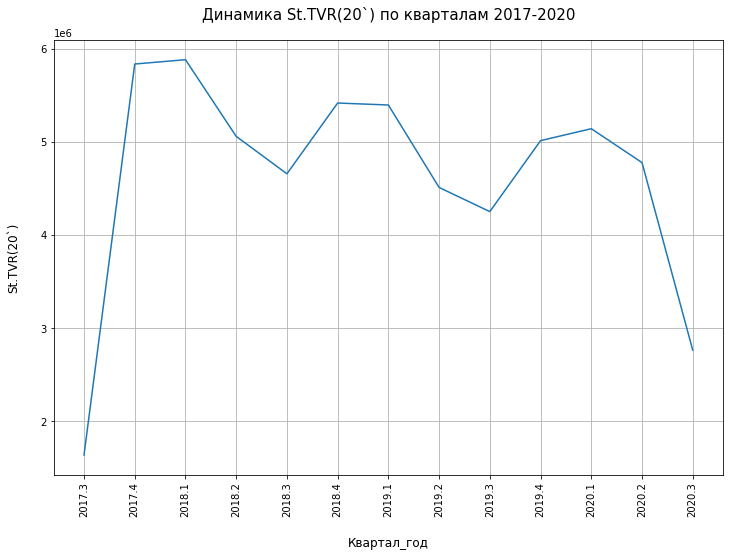

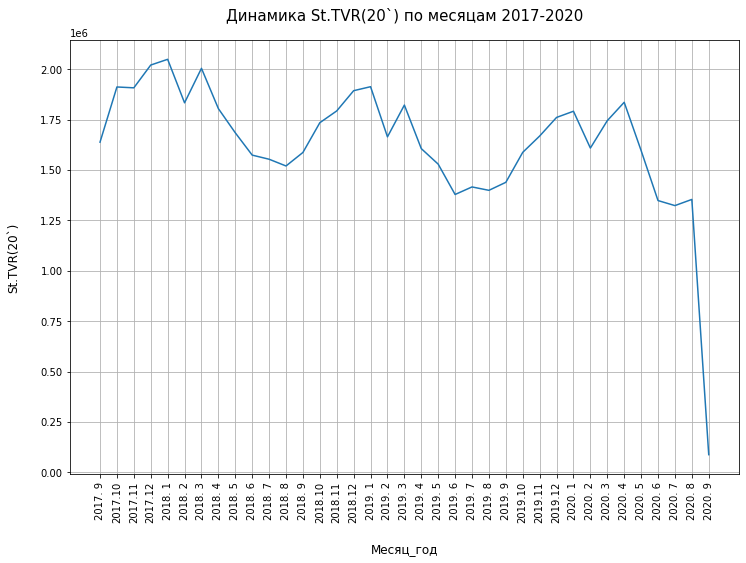

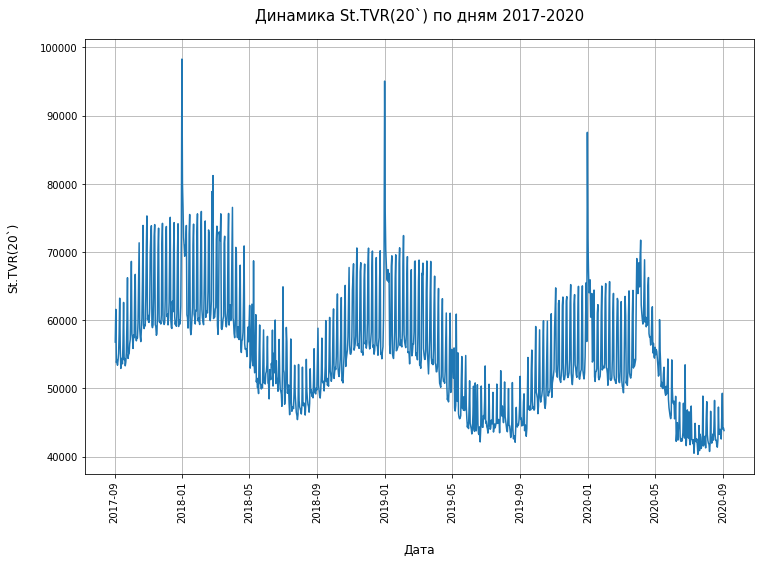

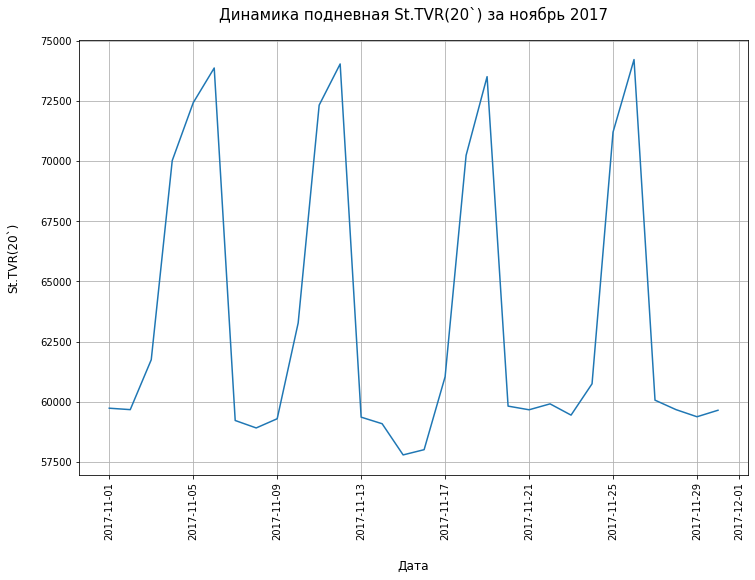

In [31]:
plt.figure(figsize=(12,8))
plot_for_grouped_data(TVR_file,"St.TVR(20`)","Квартал_год","Динамика St.TVR(20`) по кварталам 2017-2020")
plt.show()

plt.figure(figsize=(12,8))
plot_for_grouped_data(TVR_file,"St.TVR(20`)","Месяц_год","Динамика St.TVR(20`) по месяцам 2017-2020")
plt.show()

plt.figure(figsize=(12,8))
plot_for_grouped_data(TVR_file,"St.TVR(20`)","Дата","Динамика St.TVR(20`) по дням 2017-2020")
plt.show()

plt.figure(figsize=(12,8))
plot_for_grouped_data(TVR_file[TVR_file["Месяц_год"] == "2017.11"],"St.TVR(20`)","Дата","Динамика подневная St.TVR(20`) за ноябрь 2017")
plt.show()


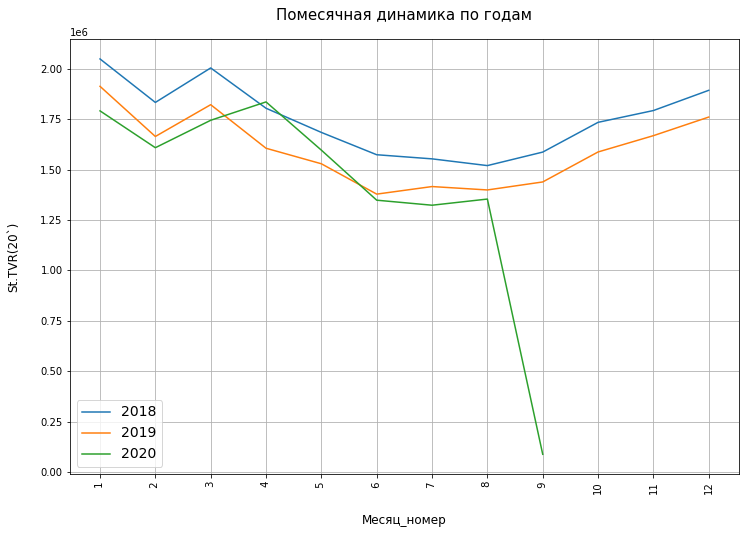

In [32]:
plt.figure(figsize=(12,8))
year_list = [2018,2019,2020]
for i in year_list:
    plot_for_grouped_data(TVR_file[TVR_file['Год'] == i],"St.TVR(20`)","Месяц_номер", "Помесячная динамика по годам")
    plt.legend(year_list,fontsize=14)
plt.show()

По графикам ярко выражена годовая и недельная сезонность:

1. падение рейтингов во 2 и 3 (антилидер) квартале и потом рост в 4 и 1 (лидер) кварталах
2.в-целом пики телесмотрения наблюдаются в декабре-январе-марте
3.исходя из погодового графика наблюдается нисходящий тренд по общему 
телесмотрению
4.также ярко выражены пики в январе (январские праздники)
5.выражена сезонность внутри недель (выше в выходные дни)
6.в 2020 году появился третий пик по втором квартале (из-за карантина) - мы видим резкий рост в апреле 2020 и более высокие показатели в мае, 
чем должны были быть исходя из обычной динамики. В июне тренд более-менее восстановился

Обязательно проверить качество прогнозных моделей в 20 году и, возможно, скорректировать модели 


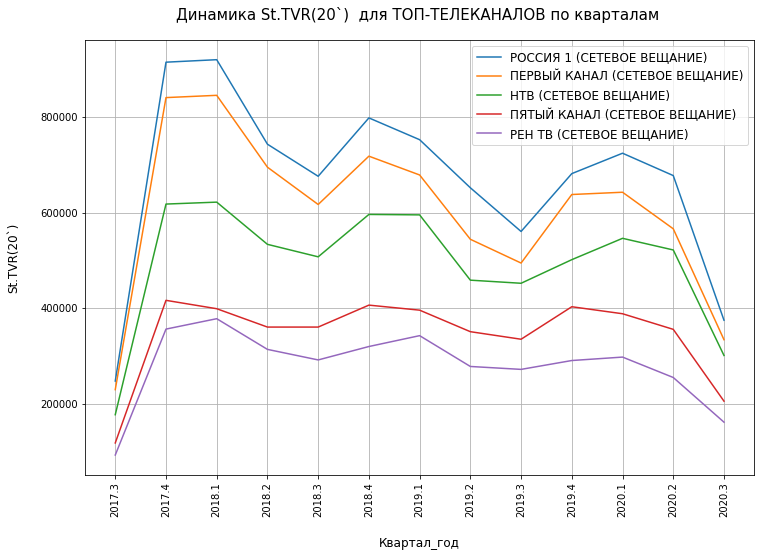

In [33]:
plt.figure(figsize=(12,8))
list_channels = list(Channels_paretto_full.index[0:5])
TVR_file["Квартал_год"] = TVR_file["Квартал_год"].astype(str)
for i in list_channels:
    plot_for_grouped_data(TVR_file[TVR_file['Телекомпания_оригинала'] == i],"St.TVR(20`)","Квартал_год","Динамика St.TVR(20`)  для ТОП-ТЕЛЕКАНАЛОВ по кварталам ")
    plt.legend(list_channels,fontsize=12)
plt.show()

Выраженная сезонность, которую мы наблюдали на всем рынке, характерна также и для ТОП телеканалов. 

Соответственно, предположительно прогнозы поканальные можно строить на основе модели, построенной для всего рынка

# **Метрики**
Для оценки прогнозных моделей будем сравнивать их метрики.

Создадим функции для основных метрик MAPE и MSE

In [34]:
def MSE(y_true, y_pred):
    return ((y_pred - y_true) ** 2).mean()


def MAPE(y_true, y_pred):
    return (np.abs(y_pred - y_true)/y_true).mean()

# **Построение прогнозов рейтингов (st.TVR(20))**

### **Будем использовать модуль Prophet, так как он подходит для построения временных рядов**



1. Построим прогноз рейтингов на следующее  полугодие на основе всех доступных временных данных (6 полугодиий) (используем "коробочное" решение prophet)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


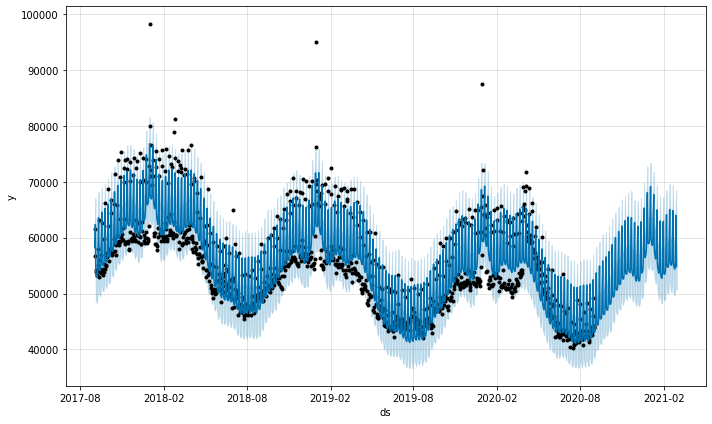

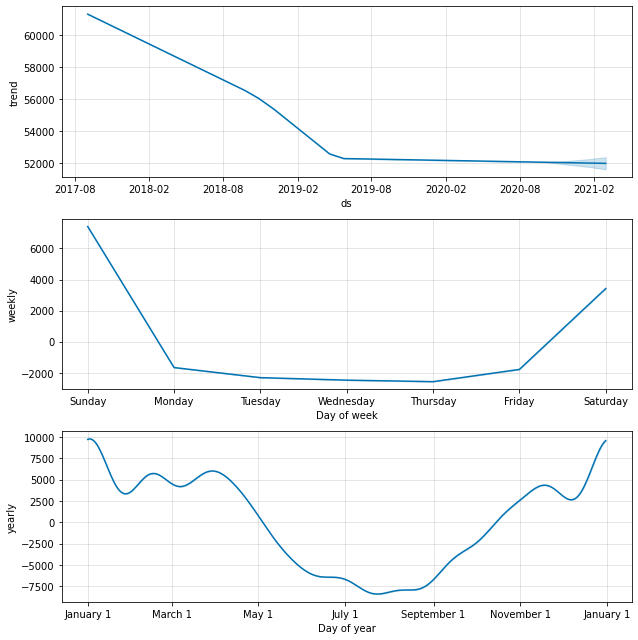

In [35]:
df_initial = TVR_file.groupby("Дата")['St.TVR(20`)'].sum()
period = 180
prediction = None

df_fact = df_initial.to_frame().reset_index()
df_fact.rename(columns={"Дата":'ds', "St.TVR(20`)": 'y'}, inplace=True)

if prediction == None:
    df_for_prophet = df_initial.to_frame().reset_index()
    df_for_prophet.rename(columns={"Дата":'ds', "St.TVR(20`)": 'y'}, inplace=True)
else:
    df_for_prophet = df_initial[:-prediction].to_frame().reset_index()
    df_for_prophet.rename(columns={"Дата":'ds', "St.TVR(20`)": 'y'}, inplace=True)

m = Prophet()
m.fit(df_for_prophet)

future = m.make_future_dataframe(periods = period)
forecast = m.predict(future)

if prediction == None:
   prophet_fact_forecast = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df_for_prophet.set_index('ds'))
else:
   prophet_fact_forecast = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join( df_fact.set_index('ds')) 


fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)


y_pred_full = prophet_fact_forecast["yhat"].values
y_true_full = prophet_fact_forecast["y"].values
dates = prophet_fact_forecast.index
    


Первоначальные выводы по модели:
1. Модель довольно хорошо  определила сезонность
2. Модель показывает стагнацию рынка после падения  (скорее всего связано с "завышенными" данными в период карантина во 2 квартале 2020 года. Без него скорее всего было бы падение)
3. Есть выраженная годовая сезонность роста с осени, и падения весной
4. Есть выраженная недельная сезонность (пики в выходные дни)
5. Построенный прогноз визуально с не очень большим отклонением, несмотря на то, что прогнозировали на основе в том числе "карантинного" периода

Далее планируется сделать прогноз рейтингов на основе  двух моделей ( prophet и sklearn) и выбрать оптимальную.

Для этого построим прогноз на основе 2-5 полугодия на 6 полугодие (чтобы использовать одни и те же тестовые выборки для сравнения метрик),

оптимизируем модели,

найдем метрики MSE и MAPE,

сравним модели.

Для оптимизации работы определим функцию для построения prophet модели (1. В функцию для построения модели prophet сразу включим параметры holidays и hangepoint_prior_scale, которые планирую оптимизировать 2. Функция будет возвращать таблицу с прогнозируемыми данными и фактическими) 

In [36]:
def prophet_model_for_validation(df_initial, period, prediction = None, holidays = None, changepoint_prior_scale = 0.05):

    
    df_fact = df_initial.to_frame().reset_index()
    df_fact.rename(columns={"Дата":'ds', "St.TVR(20`)": 'y'}, inplace=True)
    
    if prediction == None:
        df_for_prophet = df_initial.to_frame().reset_index()
        df_for_prophet.rename(columns={"Дата":'ds', "St.TVR(20`)": 'y'}, inplace=True)
    else:
        df_for_prophet = df_initial[:-prediction].to_frame().reset_index()
        df_for_prophet.rename(columns={"Дата":'ds', "St.TVR(20`)": 'y'}, inplace=True)
    
    m = Prophet(holidays = holidays, changepoint_prior_scale = changepoint_prior_scale )
    m.fit(df_for_prophet)
    
    future = m.make_future_dataframe(periods=period )
    forecast = m.predict(future)
    
    if prediction == None:
       prophet_fact_forecast = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df_for_prophet.set_index('ds'))
    else:
       prophet_fact_forecast = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join( df_fact.set_index('ds')) 

    # fig1 = m.plot(forecast)
    # fig2 = m.plot_components(forecast)

    return prophet_fact_forecast




Построим БАЗОВУЮ модель, на которой будем сравнивать метрики.

Выбор данных для Базовой модели:

1. Для линейной регрессии нужны обучающая и тестовая выборки. Так как у нас данные за 6 полугодий, то для для линейной регрессии обучающая выборка будет 1-4 полугодие (прогноз на 5 полугодие), а тестовая 2-5 полугодие (прогноз на 6 полугодие).

2. В модели профет используем данные тестовой выборки (для нее нет отдельно обучающей и тестовой выборки)

2. Для базовой модели не будем использовать дополнительные критерии

    


**Базовая модель** (данные 2-6 полугодие, perdiction 180 дней (предсказываем последние 180 дней  - 6ое полугодие)

Выведем таблицу с факт (y) и прогнозными (yhat) данными
и визуализируем данные

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


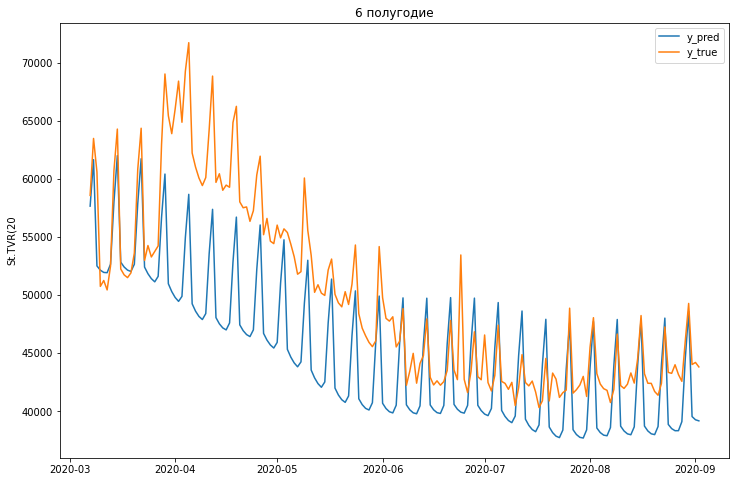

MSE:  43542334.84145932
MAPE:  0.10035580514674881


In [37]:

df_initial = TVR_file.groupby("Дата")['St.TVR(20`)'].sum()[180:]
period = 180
prediction = 180
prophet_fact_forecast = prophet_model_for_validation(df_initial, period, prediction)

y_true = prophet_fact_forecast["y"].values[-180:]
y_pred = prophet_fact_forecast["yhat"].values[-180:]
dates = prophet_fact_forecast.index

plt.figure(figsize=(12,8))
plt.plot(dates[-180:],  y_pred, label = "y_pred")
plt.plot(dates[-180:], y_true, label = "y_true")
plt.ylabel("St.TVR(20")
plt.title("6 полугодие")
plt.legend()
plt.show()
print("MSE: ", MSE(y_true,y_pred ))
print("MAPE: ", MAPE(y_true,y_pred ))

В принципе, ошибка не очень большая (MAPE, MSE высокая из-за самих данных), но видим, что в прогнозе на апрель - май,  хотя тенденции угаданы, но отклонения в среднем выше, чем по другим периодам (это связано с нестандартной тенденцией в карантин).

(Для интереса проверила ошибку при прогнозе 2-3-4 полугодия на 5 полугодие. Ошибка оказалась еще больше. За базовую модель будем считать изначальную)

Попробуем улучшить метрики базовой модели 

**Первый вариант оптимизации** - УДАЛЕНИЕ "ВЫБРОСОВ"

1.Удаление выбросов в январе. 
По первоначальному графику мы видели, что есть 3 больших выброса в январе, выпадающих на новогодние праздники. И несколько других, поменьше

2.Построим модель без них.

3.Для этого построим таблицу с данными c самыми высокими "выбросами" ('St.TVR(20`)'), а потом в данных для построения модели исключим эти данные

In [38]:

vibros = TVR_file.groupby("Дата")['St.TVR(20`)'].sum().sort_values(ascending = False)
vibros_list = vibros.head(10).index
 


**Базовая модель без "выбросов"**

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


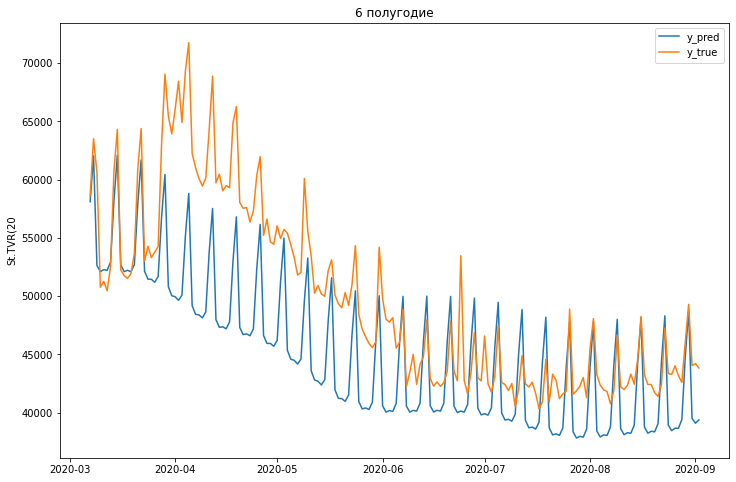

MSE:  42787083.16999822
MAPE:  0.09908218596579926


In [39]:

df_initial = TVR_file.loc[~TVR_file["Дата"].isin(vibros_list)]
df_initial = df_initial.groupby("Дата")['St.TVR(20`)'].sum()[180:]
period = 180
prediction = 180


prophet_fact_forecast = prophet_model_for_validation(df_initial, period, prediction)


y_true = prophet_fact_forecast["y"].values[-180:]
y_pred = prophet_fact_forecast["yhat"].values[-180:]
dates = prophet_fact_forecast.index


plt.figure(figsize=(12,8))
plt.plot(dates[-180:],  y_pred, label = "y_pred")
plt.plot(dates[-180:], y_true, label = "y_true")
plt.ylabel("St.TVR(20")
plt.legend()
plt.title("6 полугодие")
plt.show()
print("MSE: ", MSE(y_true,y_pred ))
print("MAPE: ", MAPE(y_true,y_pred ))

Как мы видим, MAPE хоть незначительно, но улучшилась до 0.099 (с 0.1). MSE тоже уменьшилась. В окончательной модели будем использовать данную оптимизацию

**Второй вариант улучшений** - HOLIDAYS

1. Добавим праздники в модель
2. Создадим таблицу с праздниками. Так как в исходной таблице и праздники и выходные могут быть как просто "выходными", так и "праздниками",
я отбросила те, которые выпадают на субботу и воскресенье (они в любом случае включаются в недельную сезонность), и оставила только "внеплановые" выходные. Плюс добавила праздники на 2021
3. Приведем в формат для профет (ds и y) и получим 
список праздников holiday_dates

In [40]:
holiday_dates = TVR_file[(TVR_file["День_тип"]=='Праздник')|(TVR_file["День_тип"]=='Выходной')]
holiday_dates = holiday_dates[(holiday_dates["День_недели"]!='Суббота') & (holiday_dates["День_недели"]!='Воскресенье')]
holiday_dates = holiday_dates.groupby("Дата")['St.TVR(20`)'].sum().to_frame().reset_index()
holiday_dates = holiday_dates.drop('St.TVR(20`)',axis = 1)

holiday_dates_2021 = pd.DataFrame (["2021-01-01","2021-01-02","2021-01-03","2021-01-04","2021-01-05","2021-01-06","2021-01-07","2021-01-08","2021-01-09","2021-01-10",],
                                   columns = ["Дата"])
pd.to_datetime(holiday_dates_2021['Дата'])


holiday_dates.append(holiday_dates_2021,ignore_index=True)


holiday_dates["holiday"] = "holiday"
holiday_dates.columns=["ds","holiday"]


**Базовая модель с holidays**

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


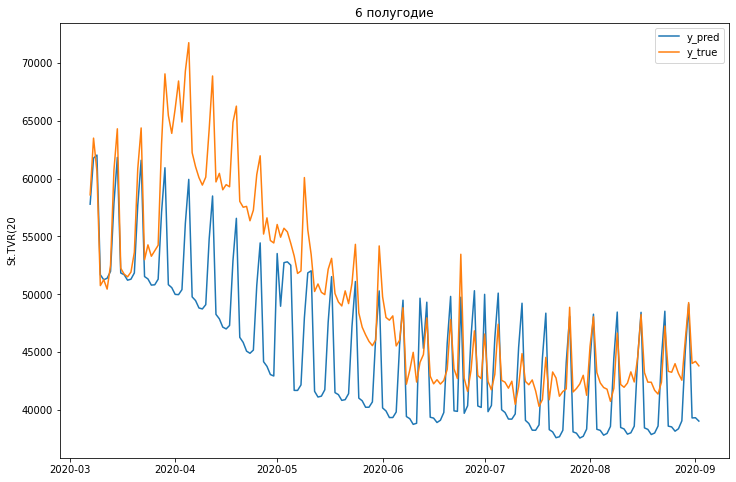

MSE:  43272562.42145325
MAPE:  0.10061169900305073


In [41]:
df_initial = TVR_file.groupby("Дата")['St.TVR(20`)'].sum()[180:]
period = 180
prediction = 180 
holidays = holiday_dates


prophet_fact_forecast = prophet_model_for_validation(df_initial, period, prediction, holidays)

y_true = prophet_fact_forecast["y"].values[-180:]
y_pred = prophet_fact_forecast["yhat"].values[-180:]
dates = prophet_fact_forecast.index

plt.figure(figsize=(12,8))
plt.plot(dates[-180:],  y_pred, label = "y_pred")
plt.plot(dates[-180:], y_true, label = "y_true")
plt.ylabel("St.TVR(20")
plt.title("6 полугодие")
plt.legend()
plt.show()
print("MSE: ", MSE(y_true,y_pred ))
print("MAPE: ", MAPE(y_true,y_pred ))

Как мы видим, MAPE немного ухудшлось, а MSE улучшилось. Сомнительная оптимизация. Сравним влияние на финальной модели

**Третий вариант улучшений** - changepoint_prior_scale (сглаженность графика)


**Базовая модель с changepoint_prior_scale**

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


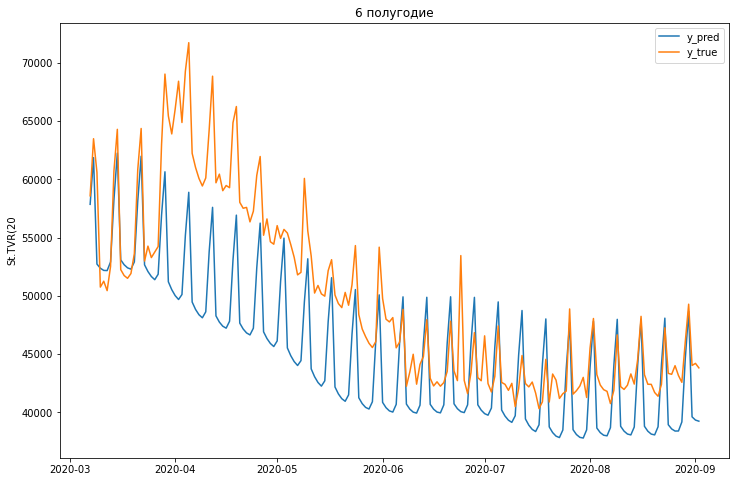

MSE:  41842759.81130604
MAPE:  0.0981994394858099


In [42]:
df_initial = TVR_file.groupby("Дата")['St.TVR(20`)'].sum()[180:]
period = 180
prediction = 180 
changepoint_prior_scale = 0.03


prophet_fact_forecast = prophet_model_for_validation(df_initial, period, prediction, changepoint_prior_scale = changepoint_prior_scale )


y_true = prophet_fact_forecast["y"].values[-180:]
y_pred = prophet_fact_forecast["yhat"].values[-180:]
dates = prophet_fact_forecast.index

plt.figure(figsize=(12,8))
plt.plot(dates[-180:],  y_pred, label = "y_pred")
plt.plot(dates[-180:], y_true, label = "y_true")
plt.ylabel("St.TVR(20")
plt.legend()
plt.title("6 полугодие")
plt.show()
print("MSE: ", MSE(y_true,y_pred ))
print("MAPE: ", MAPE(y_true,y_pred ))

Методом перебора подобрала такое значение changepoint.prior.scale (0.03), при котором немного уменьшились ошибки. Будем использовать в модели

Итого для финальной обучающей модели мы к **базовой модели применим** следующие оптимизации:

1. удаление выбросов
2. changepoint.prior.scale (0.03)
3. добавление праздников (под вопросом)


**Финальная обучающая модель**

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


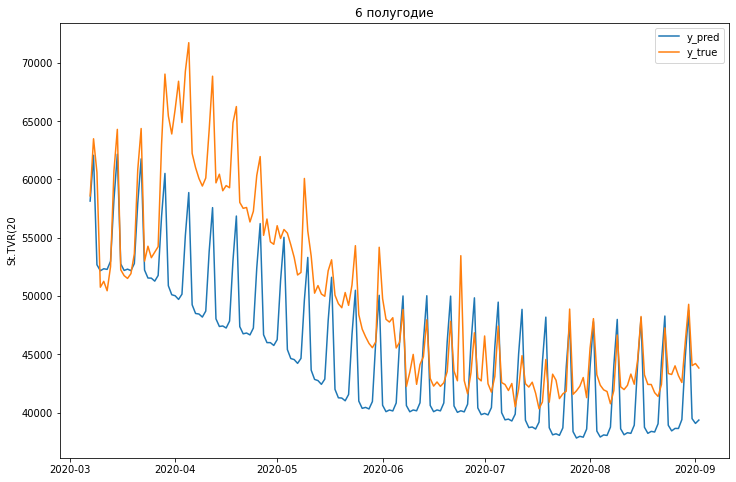

MSE:  42302145.5583887
MAPE:  0.09861391954399096


In [43]:
df_initial = TVR_file.loc[~TVR_file["Дата"].isin(vibros_list)]
df_initial = df_initial.groupby("Дата")['St.TVR(20`)'].sum()[180:]
period = 180
prediction = 180 
changepoint_prior_scale = 0.03
holidays = holiday_dates


prophet_fact_forecast = prophet_model_for_validation(df_initial, period, prediction, changepoint_prior_scale = changepoint_prior_scale )


y_true = prophet_fact_forecast["y"].values[-180:]
y_pred = prophet_fact_forecast["yhat"].values[-180:]
dates = prophet_fact_forecast.index

plt.figure(figsize=(12,8))
plt.plot(dates[-180:],  y_pred, label = "y_pred")
plt.plot(dates[-180:], y_true, label = "y_true")
plt.ylabel("St.TVR(20")
plt.legend()
plt.title("6 полугодие")
plt.show()
print("MSE: ", MSE(y_true,y_pred ))
print("MAPE: ", MAPE(y_true,y_pred ))

При учете всех трех изменений у нас высокая ошибка. Поэтому я по очереди перебрала "улучшения", и в результате использовала только два 
(без holidays, которое изначально было под некоторым вопросом)

In [44]:
# Выведем финальные ошибки Prophet:
y_true = prophet_fact_forecast["y"].values[-180:]
y_pred = prophet_fact_forecast["yhat"].values[-180:]

print("MSE : ", MSE(y_true,y_pred ))
print("MAPE : ", MAPE(y_true,y_pred ))

# print("MSE по полугодиям: ", MSE(sum(y_true),sum(y_pred) ))
# print("MAPE по полугодиям: ", MAPE(sum(y_true),sum(y_pred) ))


MSE :  42302145.5583887
MAPE :  0.09861391954399096


# **Модель линейной регрессии.**

Будем строить регрессионную модель.

Для сравнения с метриками модели Prophet -должны совпадать тестовые базы (т.е. модель на основе 2-5 полугодия, прогноз на 6 полугодие,те же данные (без  выбросов))

Таким образом, будем делать по следующей схеме:

1. Обучающую модель будем строить на основе 1-4 полугодий на 5 полугодие.
2. Далее строим модель на основе 2-5 полугодий на 6 полугодия с коэффициентами из обучающей модели 
3. Рассчитываем метрики на основе 6 полугодия (true и pred)
4. Сравниваем метрики с метриками, полученными в профете


In [45]:
df_initial = TVR_file.loc[~TVR_file["Дата"].isin(vibros_list)]
# данные за 1-4 полугодие
df_initial_x_train = df_initial.groupby("Дата")['St.TVR(20`)'].sum()[:720]
#данные за 5 полугодие
df_initial_y_train = df_initial.groupby("Дата")['St.TVR(20`)'].sum()[720:900]


X_train = df_initial_x_train.values.reshape(4,180).T
#df_initial_pred.shape
#df_initial_train.shape
y_train = df_initial_y_train.values.reshape(-1,1)



In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.coef_


array([[ 0.19275822, -0.28009375, -0.03565318, -0.22269618]])

Построим **базовую модель** с найденными коэффициентами на тестовой выборке (за 2-5 полугодие на 6 полугодие и сравним с фактом)

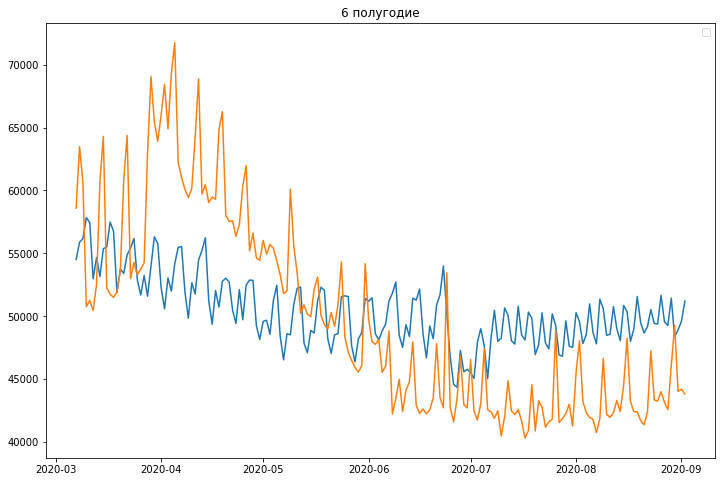

MSE:  69915379.91002342
MAPE:  0.14076796403975214


In [47]:
df_initial = TVR_file.loc[~TVR_file["Дата"].isin(vibros_list)]
# данные за 2-5 полугодие
df_initial_x_test = df_initial.groupby("Дата")['St.TVR(20`)'].sum()[-900:-180]
#данные за 6 полугодие
df_initial_y_test_fact = df_initial.groupby("Дата")['St.TVR(20`)'].sum()[-180:]

X_test = df_initial_x_test.values.reshape(4,180).T
#y_train = df_initial_train_pred.values.reshape(-1,1)
y_pred = lr.predict(X_test)


y_true = df_initial_y_test_fact.values
y_pred = y_pred 
dates = df_initial_y_test_fact.index

plt.figure(figsize=(12,8))
plt.plot(dates,  y_pred)
plt.plot(dates, y_true)
plt.title("6 полугодие")
plt.legend()
plt.show()
print("MSE: ", MSE(y_true,y_pred ))
print("MAPE: ", MAPE(y_true,y_pred ))


Как мы видим, модель намного хуже отработала, чем prophet. Визуально больше отклонений, а также выше и MSE и MAPE



**Первый вариант оптимизации** - Логарифмирование

Попробуем применить логарифмирование, так как разброс очень велик.

In [48]:
print("min",df_initial_x_train.min())
print("max",df_initial_x_train.max())


min 42107.119999999944
max 75658.41000000003


**Базовая модель с логарифмированием**

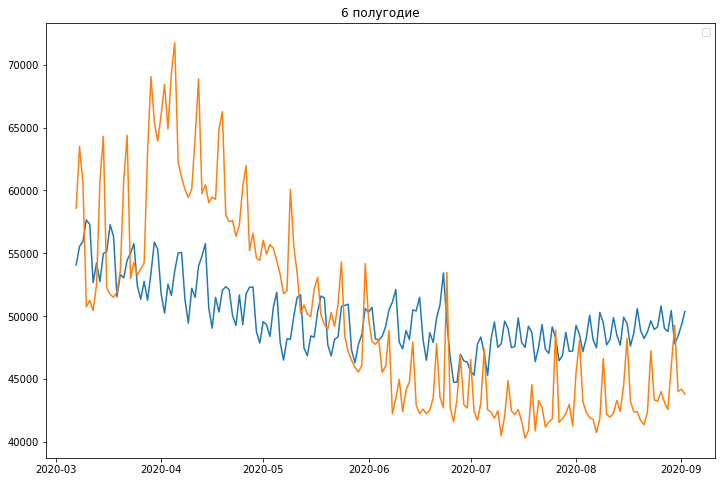

MSE:  69122665.27010435
MAPE:  0.1376206338372454


In [49]:
# Данные без выбросов
df_initial = TVR_file.loc[~TVR_file["Дата"].isin(vibros_list)]
# данные за 1-4 полугодие
df_initial_x_train = df_initial.groupby("Дата")['St.TVR(20`)'].sum()[:720]
#данные за 5 полугодие
df_initial_y_train = df_initial.groupby("Дата")['St.TVR(20`)'].sum()[720:900]

X_train = df_initial_x_train.values.reshape(4,180).T
y_train = df_initial_y_train.values.reshape(-1,1)
X_train_log = np.log(X_train)
y_train_log = np.log(y_train)

lr = LinearRegression()
lr.fit(X_train_log, y_train_log)
lr.coef_

df_initial = TVR_file.loc[~TVR_file["Дата"].isin(vibros_list)]
# данные за 2-5 полугодие
df_initial_x_test = df_initial.groupby("Дата")['St.TVR(20`)'].sum()[-900:-180]
#данные за 6 полугодие
df_initial_y_test_fact = df_initial.groupby("Дата")['St.TVR(20`)'].sum()[-180:]

X_test = df_initial_x_test.values.reshape(4,180).T
X_test_log = np.log(X_test)
y_pred_log = lr.predict(X_test_log)

# Перед оценкой качества нужно экспонировать значения 
y_pred_no_log =np.exp(y_pred_log)
y_true = df_initial_y_test_fact.values
y_pred = y_pred_no_log 
dates = df_initial_y_test_fact.index


plt.figure(figsize=(12,8))
plt.plot(dates,  y_pred)
plt.plot(dates, y_true)
plt.legend()
plt.title("6 полугодие")
plt.show()
print("MSE: ", MSE(y_true,y_pred ))
print("MAPE: ", MAPE(y_true,y_pred ))


Ошибка хоть немного улучшилась, но все равно остается высокой, особенно по сравнению с моделью prophet


# Для прогнозирования общих рейтингов и рейтингов телеканала будем использовать prophet

# **Поканальный прогноз на 2 года**

Сделаем прогноз для топ-каналов (двух)

In [50]:
list_channels = list(TVR_file_channels_share.index[0:2])
list_channels

['РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ)', 'ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ)']

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



 для канала РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ)




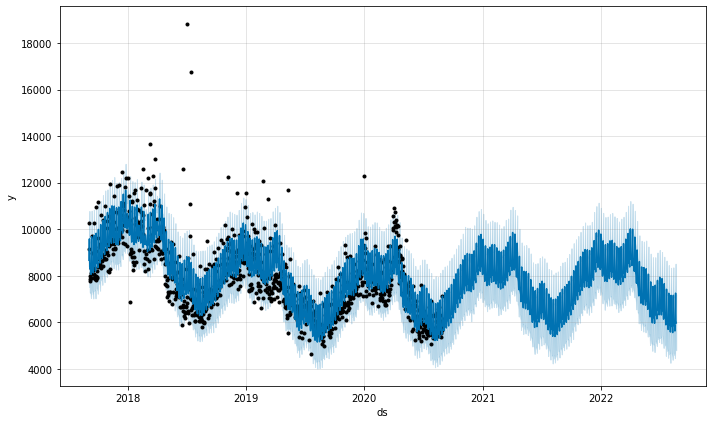

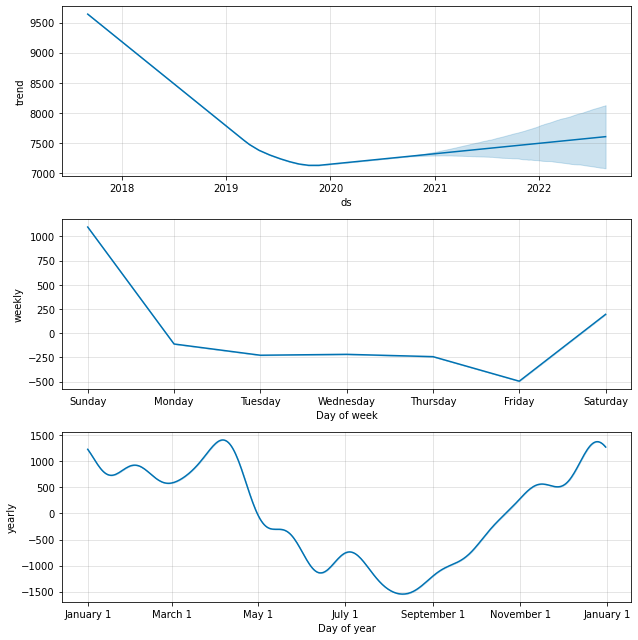

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



 для канала ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ)




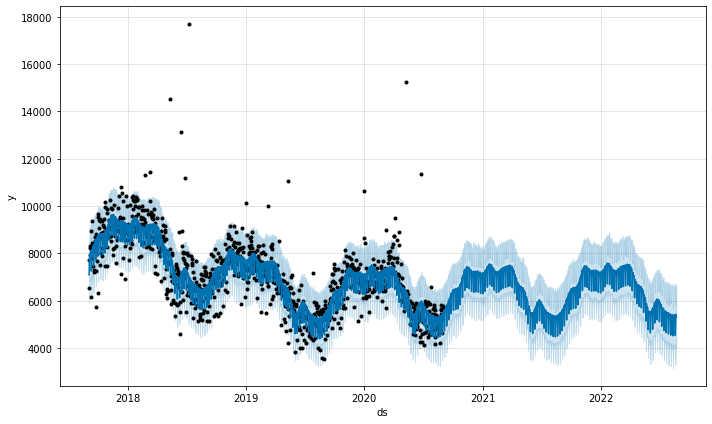

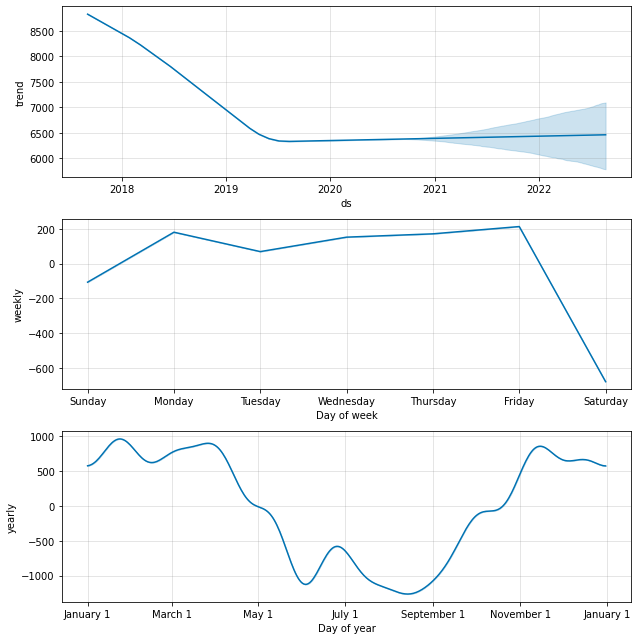

In [51]:
for i in list_channels:
    df_initial = TVR_file.loc[~TVR_file["Дата"].isin(vibros_list)]
    df_initial = df_initial[df_initial['Телекомпания_оригинала'] == i].groupby("Дата")['St.TVR(20`)'].sum()
    
    df_for_prophet = df_initial.to_frame().reset_index()
    df_for_prophet.rename(columns={"Дата":'ds', "St.TVR(20`)": 'y'}, inplace=True)

    period = 720
    changepoint_prior_scale = 0.03
    
    m = Prophet(changepoint_prior_scale = 0.03)
    m.fit(df_for_prophet)

    future = m.make_future_dataframe(periods = period)
    forecast = m.predict(future)

    print("\n","для канала {}".format(i))
    print("\n")
    fig1 = m.plot(forecast)
    fig2 = m.plot_components(forecast)
    plt.show()
    


Для 2 летнего поканального прогноза, ошибка визуально получились выше.

Скорее всего, нужно оптимизировать модели для отдельного телеканала или делать меньший период прогнозирования (проверила, что при уменьшении периода, визуально ошибка также уменьшается)

Также интересно сравнить сезонности по каналам. Они отличаются в зависимости от каналов. Например, для России рейтинги в выходные выше, а для Первого канала в субботу, наоборот, рейтинги падают, а в остальные дни "довольно ровные".


# **Взаимосвязь рейтингов и различных факторов**

**Корреляционная тепловая матрица.**

Для построения переведем категориалные признаки в числовые

In [52]:

list_program = TVR_file["Программа_жанр_"].unique()
dict_program = dict(zip(list_program, np.arange(1,len(list_program)+1)))
list_weekday = TVR_file["День_недели"].unique()
dict_weekday = dict(zip(list_weekday, np.arange(1,len(list_weekday)+1)))
list_channels = TVR_file['Телекомпания_оригинала'].unique()
dict_channels = dict(zip(list_channels, np.arange(1,len(list_channels)+1)))

TVR_file["Телеканалы_номер"] = TVR_file['Телекомпания_оригинала'].apply(lambda str:dict_channels [str] )
TVR_file["День_недели_номер"] = TVR_file["День_недели"].apply(lambda str:dict_weekday[str] )
TVR_file["Программа_жанр_номер"] = TVR_file["Программа_жанр_"].apply(lambda str:dict_program[str] )

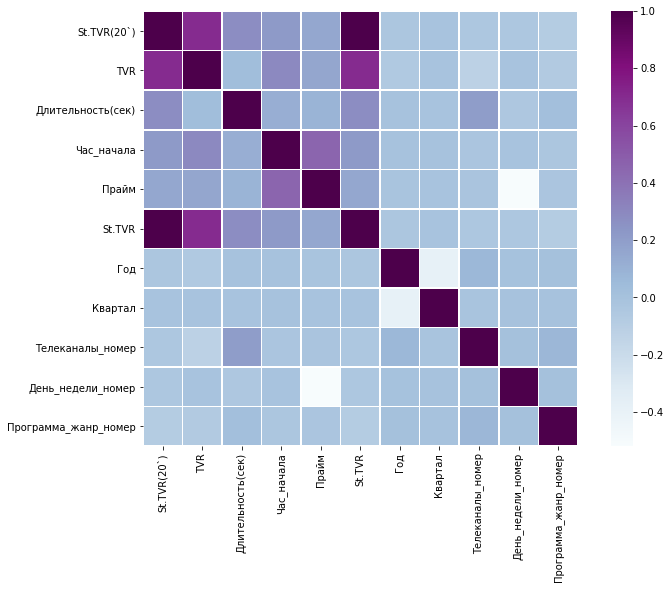

In [53]:
corr_all = TVR_file.corr()

fig, ax0 = plt.subplots(figsize = (12, 8))
sns.heatmap(corr_all,
            square = True, linewidths = .5, ax = ax0,cmap = "BuPu")    
plt.show()


По этим данным, TVR сильнее всего коррелирует с ST TVR, длительностью (что логично).

По графику также есть связь (не сильно выраженная) с часом начала, праймом и телеканалом.
Но данная модель не очень корректная, так как плохо учитывает категориальные признаки.

Проверим взаимосвязь на отдельных графиках, а также на множественной регрессионной модели.

# **Взаимосвязь признаков и рейтингов**

Рассмотрим основные факторы, которые коррелируют с рейтингами.
Анализировать будем показатель TVR (средний рейтинг события), а не st TVR, чтобы нивелировать различие в длительности программ. 
Если какие-то факторы взаимосвязаны с TVR, то значит взаимосвязаны и с st.TVR  (st.TVR=TVR*длительность)



In [54]:
def bar_for_grouped_data(df,ylabel,xgrouped,title = ""):
    plt.figure(figsize=(12,8))
    df.plot(kind = "bar",width = 0.35)
    if title == "":
         plt.title("Динамика {} по {} ".format(ylabel,xgrouped),fontweight =20, fontsize=15, pad = 20)
    else:
         plt.title(title,fontweight =20, fontsize=15, pad = 20)
    plt.grid(axis = "y")
    plt.xlabel(xgrouped,fontsize=12,labelpad=20)
    plt.ylabel(ylabel,fontsize=12,labelpad=20)
    plt.xticks(rotation = 90)

**прайм-непрайм и рейтинги**

<Figure size 864x576 with 0 Axes>

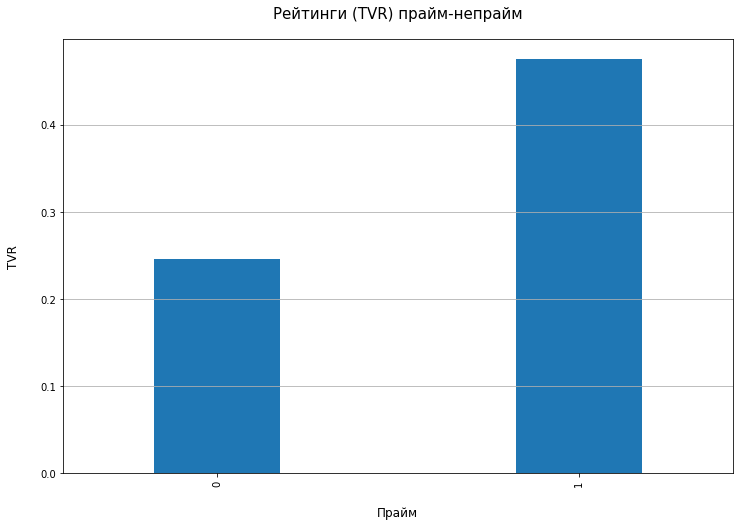

In [55]:
plt.figure(figsize=(12,8))
df =(TVR_file.groupby(["Прайм"])["St.TVR"].sum()/TVR_file.groupby(["Прайм"])["Длительность(сек)"].sum())
bar_for_grouped_data(df,"TVR","Прайм","Рейтинги (TVR) прайм-непрайм" )


Средние рейтинги в прайм ожидаемо выше непраймовых

**время выхода программы**

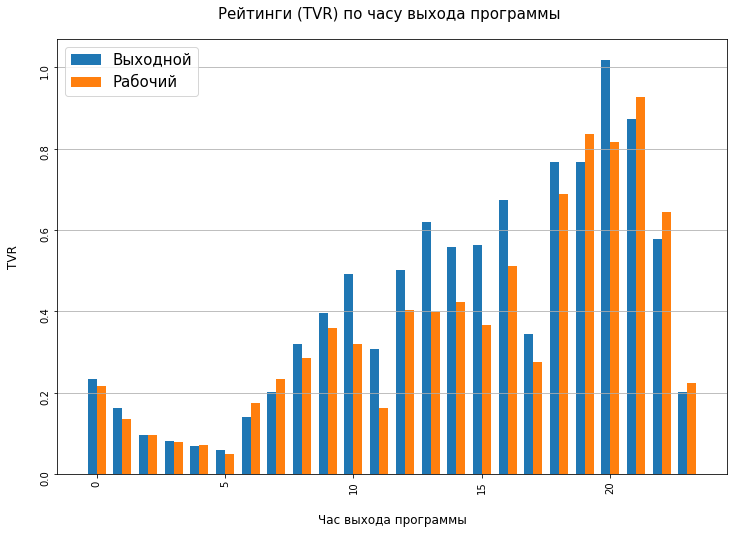

In [56]:
fig,ax = plt.subplots(figsize=(12, 8))
width = 0.35
TVR_file["Час_начала1"] = TVR_file["Час_начала"].astype(str)
x = np.arange(len(TVR_file["Час_начала"].unique()-1))
vih = ax.bar(x - width/2, (TVR_file[TVR_file["День_тип"] == "Выходной"].groupby(["Час_начала"])["St.TVR"].sum()/TVR_file[TVR_file["День_тип"] == "Выходной"].groupby(["Час_начала"])["Длительность(сек)"].sum()).values, width, label='Выходной')
budni = ax.bar(x + width/2, (TVR_file[TVR_file["День_тип"] == "Рабочий"].groupby(["Час_начала"])["St.TVR"].sum()/TVR_file[TVR_file["День_тип"] == "Рабочий"].groupby(["Час_начала"])["Длительность(сек)"].sum()).values, width, label='Рабочий')
ax.set_title("Рейтинги (TVR) по часу выхода программы ",fontweight =20, fontsize=15, pad = 20)
ax.grid(axis = 'y')
ax.set_xlabel("Час выхода программы",fontsize=12,labelpad=20)
ax.set_ylabel("TVR",fontsize=12,labelpad=20)
ax.tick_params(labelrotation = 90)
ax.legend(loc = 2, fontsize = 15)
plt.show()


Как мы видим, рейтинги различается в зависимости от времени начала передачи
Общая динамика почасам в целом похожа в  будний-выходной, но в выходной ожидаемо больше рейтинги в дневное время.
Ожидаемо пиковое время 18-21. При этом "провалы" в 11,17 и утренние часы.



**Тип программы**

<Figure size 864x576 with 0 Axes>

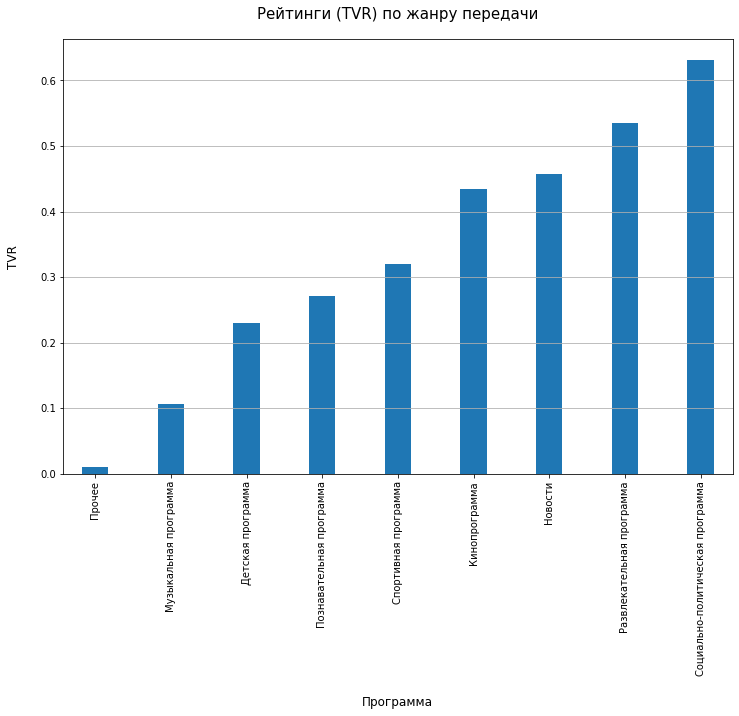

In [57]:

plt.figure(figsize=(12,8))
df =(TVR_file.groupby(['Программа_жанр_'])["St.TVR"].sum()/TVR_file.groupby(['Программа_жанр_'])["Длительность(сек)"].sum())
df = df.sort_values()
bar_for_grouped_data(df,"TVR","Программа","Рейтинги (TVR) по жанру передачи")
plt.show()

Как мы видим, средний рейтинг зависитот жанра передач. Соц-полит передач и развлекательных передач является самым высоким.

**День недели**

<Figure size 864x576 with 0 Axes>

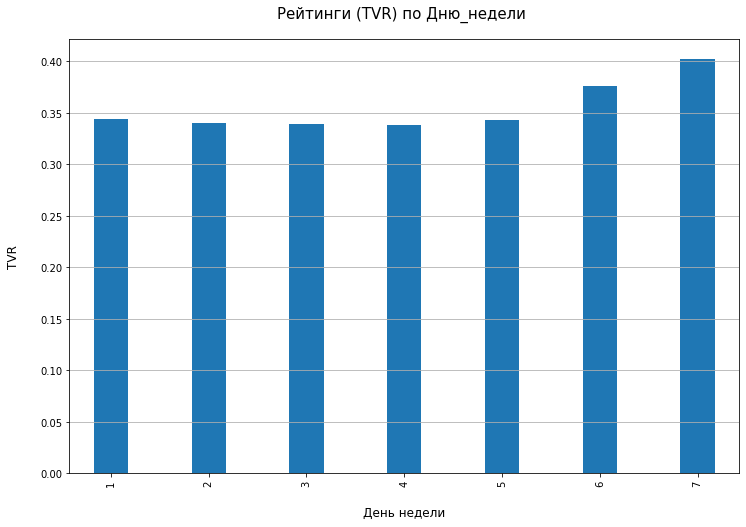

In [58]:


# Переведем дни недели в цифры, чтобы на графики можно было отобразить по порядку
dict_week_day = {'Воскресенье': 7,
 'Вторник': 2,
 'Понедельник': 1,
 'Пятница': 5,
 'Среда': 3,
 'Суббота': 6,
 'Четверг': 4}
df=(TVR_file.groupby(['День_недели'])["St.TVR"].sum()/TVR_file.groupby(['День_недели'])["Длительность(сек)"].sum())
df = df.to_frame("TVR").reset_index()
df["День_недели_номер"] = df["День_недели"].apply(lambda x:dict_week_day[x])
df = df.sort_values("День_недели_номер")
df = df.set_index("День_недели_номер")
df = df.groupby("День_недели_номер")["TVR"].sum()
df

plt.figure(figsize=(12,8))
bar_for_grouped_data(df,"TVR","День недели","Рейтинги (TVR) по Дню_недели ")
plt.show()

В среднем средние рейтинги не сильно отличаются в будни от дня недели. 
Лидерами ожидаемо являются воскресенье и суббота. 
Проверим обобщенные данные на типе дня (рабочий-выходной)

**Тип дня**

<Figure size 864x576 with 0 Axes>

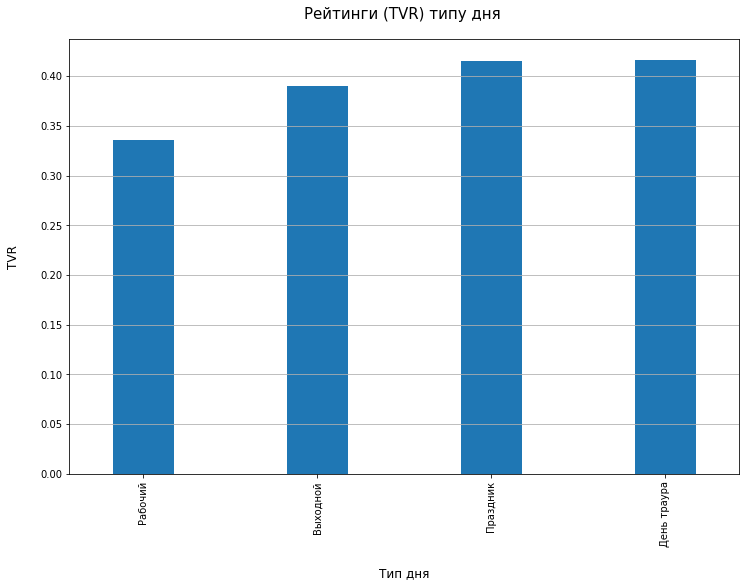

In [59]:
plt.figure(figsize=(12,8))
df =(TVR_file.groupby(['День_тип'])["St.TVR"].sum()/TVR_file.groupby(['День_тип'])["Длительность(сек)"].sum())
df = df.sort_values()
bar_for_grouped_data(df,"TVR","Тип дня","Рейтинги (TVR) типу дня ")
plt.show()

Ср.рейтинги максимальны в праздники, потом в выходные дни, далее в рабочие. Что в общем логично.

Удивили "дни траура". Сделала проверку. 

Статистика по дню траура некорректна, так как обычно программы запрещены - поэтому есть небольшое количество выходов, по которым некорректно сравнивать TVR.
TVR_file[TVR_file['День_тип'] == "День траура"].shape

**Телеканал**

<Figure size 864x576 with 0 Axes>

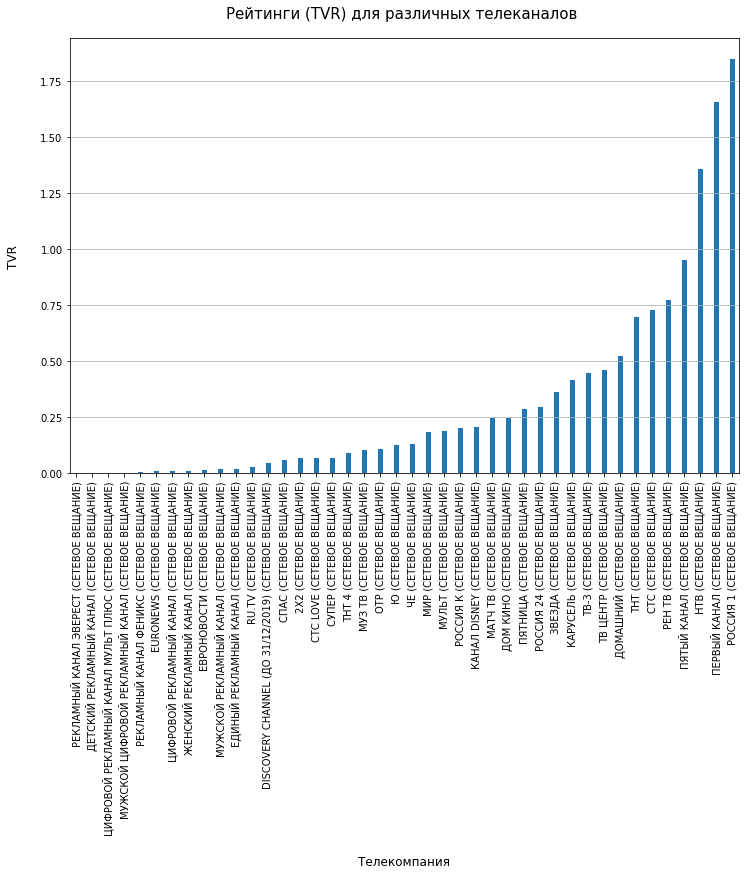

In [60]:
plt.figure(figsize=(12,8))
df =(TVR_file.groupby(['Телекомпания'])["St.TVR"].sum()/TVR_file.groupby(['Телекомпания'])["Длительность(сек)"].sum())
df = df.sort_values()
bar_for_grouped_data(df,"TVR","Телекомпания","Рейтинги (TVR) для различных телеканалов ")
plt.show()

По графику средние рейтинги по каналам сильно отличаются

## **Регрессионная модель CATBOOST**

Построим модель регрессии 

1. для определения, сколько рейтингов может набрать передача исходя из ее характеристик.
2. для определения наиболее значимых факторов для рейтингов передачи (построение feature importance)

Для модели будем использовать CATBOOST, так как он хорошо работает на категориальных признаках.
Для определения значимых факторов и визуализации будем использовать Shap

In [61]:
pip install catboost

     |████████████████████████████████| 66.2MB 70kB/s 


In [62]:

from catboost import  Pool, CatBoostRegressor

## CatBoostRegressor

Построим регрессионную модель

При построении модели:

1. Выделила тестовую и обучающую базы
2. Определила категориальные признаки
3. Построила модель на обучающей выборке
4. Посчитала ошибку на тестовой выборке

Оптимизация:

Для оптимизации ошибки (MSE):
1. Удалила "выбросы" (посчитала квантиль 10% 90% и взяла только данные, которые находятся между 10% самысми высокими и самыми низкими значениями)
2. Методом перебора и расчета ошибки подобрала количество итераций, learning rate и depth для уменьшения ошибки


In [63]:
vibros_TVR = TVR_file['TVR'].sort_values(ascending = False)
vibros_TVR_90 = TVR_file['TVR'].quantile(0.9)
vibros_TVR_10 = TVR_file['TVR'].quantile(0.1)
TVR_file_vibros_10_90 = TVR_file[(TVR_file['TVR']<= vibros_TVR_90) & (TVR_file['TVR']>= vibros_TVR_10)] 


#**Базовая модель Catboost**

In [64]:

TVR_file_CB = TVR_file_vibros_10_90 

X = TVR_file_CB.loc[:,["Длительность(сек)", 'Программа_жанр_','Месяц','Телекомпания_оригинала','День_недели','Час_начала','День_тип']]
#X = TVR_file_CB.loc[:,["Длительность(сек)", 'Час_начала',"Телеканалы_номер"]]
y = TVR_file_CB['TVR']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 123)

categorical_features_indices = np.where(X.dtypes != np.int)[0]
categorical_features_indices = list(categorical_features_indices)
train_dataset = Pool(data=X_train,
                     label=y_train,
                     cat_features=categorical_features_indices)

eval_dataset = Pool(data=X_test,
                    label=y_test,
                    cat_features=categorical_features_indices)

catmodel=CatBoostRegressor(iterations=100, depth=10, learning_rate=0.7)
catmodel.fit(train_dataset,  eval_set=eval_dataset)

y_true = y_test.values
y_pred = catmodel.predict(eval_dataset) 

print("MSE: ", MSE(y_true,y_pred ))
print("MAPE: ", MAPE(y_true,y_pred))


0:	learn: 0.1247662	test: 0.1216379	best: 0.1216379 (0)	total: 710ms	remaining: 1m 10s
1:	learn: 0.1112357	test: 0.1081764	best: 0.1081764 (1)	total: 1.21s	remaining: 59.4s
2:	learn: 0.1032359	test: 0.1007960	best: 0.1007960 (2)	total: 1.86s	remaining: 1m
3:	learn: 0.0963548	test: 0.0949029	best: 0.0949029 (3)	total: 2.36s	remaining: 56.7s
4:	learn: 0.0926760	test: 0.0924620	best: 0.0924620 (4)	total: 2.87s	remaining: 54.6s
5:	learn: 0.0907963	test: 0.0907405	best: 0.0907405 (5)	total: 3.39s	remaining: 53.1s
6:	learn: 0.0890186	test: 0.0890579	best: 0.0890579 (6)	total: 3.92s	remaining: 52.1s
7:	learn: 0.0879985	test: 0.0879909	best: 0.0879909 (7)	total: 4.45s	remaining: 51.2s
8:	learn: 0.0869954	test: 0.0871611	best: 0.0871611 (8)	total: 4.98s	remaining: 50.3s
9:	learn: 0.0863800	test: 0.0865753	best: 0.0865753 (9)	total: 5.47s	remaining: 49.3s
10:	learn: 0.0859207	test: 0.0861947	best: 0.0861947 (10)	total: 5.98s	remaining: 48.4s
11:	learn: 0.0855505	test: 0.0859243	best: 0.0859243 (

В целом, по MSE модель неплохо оптимизировала данные, но MAPE остается высоким.
Проверим на графике, насколько сильно визуально отличаются прогнозные и фактические ошибки.

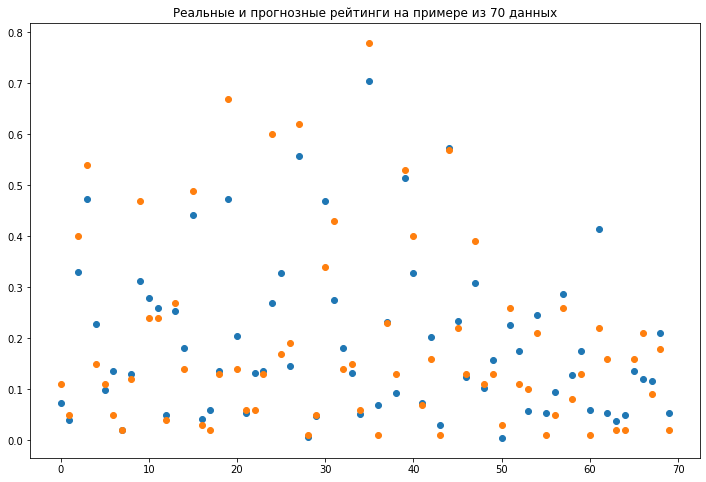

In [65]:
plt.figure(figsize=(12, 8))
plt.scatter(np.arange(0,70),y_pred[:70], label ="y_pred")
plt.scatter(np.arange(0,70),y_true[:70],label = "y_true")
plt.title("Реальные и прогнозные рейтинги на примере из 70 данных")
plt.show()


В-целом, визуально ошибка не очень значительна. Попробуем определить, почему такая высокая MAPE. Для этого рассмотрим MAPE пообъектно и построим график взаимосвязи MAPE и y_true

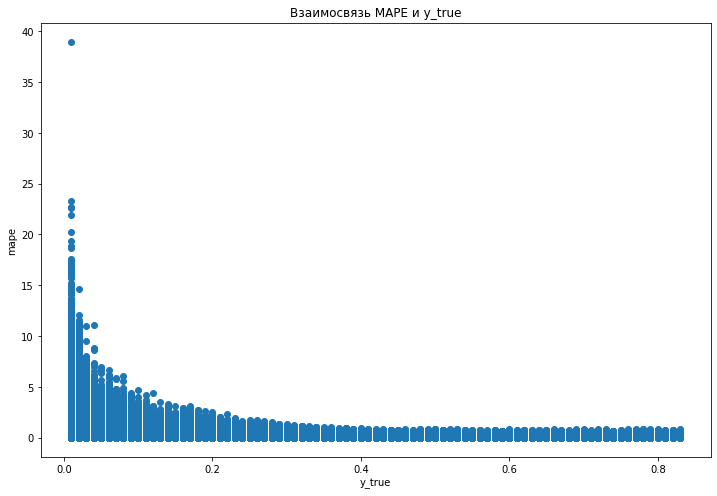

In [66]:
mape_list_sorted = []
y_true_list_sorted = []
dict_mape = {}
for i in range(0, len(y_true[:])):
    dict_mape[i] = MAPE(y_true[i],y_pred[i]), y_true[i]
#print(dict_mape)
for key, val in sorted(dict_mape.items(), key= lambda x: x[1], reverse = False):
  mape_list_sorted.append(val[0])
  y_true_list_sorted.append(val[1])

plt.figure(figsize=(12, 8))
plt.scatter(y_true_list_sorted, mape_list_sorted )
plt.xlabel("y_true")
plt.ylabel("mape")
plt.title("Взаимосвязь MAPE и y_true")
plt.show()

Как мы видим, ошибка резко увеличивается на "низких" значениях данных.

Рассмотрим варианты оптимизации модели

**1 вариант оптимизации  - логарифмирование**

In [67]:
vibros_TVR = TVR_file['TVR'].sort_values(ascending = False)
vibros_TVR_90 = TVR_file['TVR'].quantile(0.9)
vibros_TVR_10 = TVR_file['TVR'].quantile(0.1)
TVR_file_vibros_10_90 = TVR_file[(TVR_file['TVR']<= vibros_TVR_90) & (TVR_file['TVR']>= vibros_TVR_10)] 


TVR_file_CB = TVR_file_vibros_10_90 
X = TVR_file_CB.loc[:,["Длительность(сек)", 'Программа_жанр_','Месяц','Телекомпания_оригинала','День_недели','Час_начала','День_тип']]
y = TVR_file_CB['TVR']
y_log  = np.log(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_log, train_size = 0.7, random_state = 123)

categorical_features_indices = np.where(X.dtypes != np.int)[0]
categorical_features_indices = list(categorical_features_indices)
train_dataset = Pool(data=X_train,
                     label=y_train,
                     cat_features=categorical_features_indices)

eval_dataset = Pool(data=X_test,
                    label=y_test,
                    cat_features=categorical_features_indices)

catmodel=CatBoostRegressor(iterations=100, depth=10, learning_rate=0.7)
catmodel.fit(train_dataset,  eval_set=eval_dataset)

y_true = np.exp(y_test.values)
y_pred = np.exp(catmodel.predict(eval_dataset))

print("MSE: ", MSE(y_true,y_pred ))
print("MAPE: ", MAPE(y_true,y_pred))


0:	learn: 0.7155493	test: 0.7093188	best: 0.7093188 (0)	total: 616ms	remaining: 1m
1:	learn: 0.6318338	test: 0.6255707	best: 0.6255707 (1)	total: 1.14s	remaining: 55.8s
2:	learn: 0.5969893	test: 0.5915083	best: 0.5915083 (2)	total: 1.75s	remaining: 56.7s
3:	learn: 0.5779044	test: 0.5752893	best: 0.5752893 (3)	total: 2.29s	remaining: 54.9s
4:	learn: 0.5544648	test: 0.5529536	best: 0.5529536 (4)	total: 2.83s	remaining: 53.9s
5:	learn: 0.5461984	test: 0.5447781	best: 0.5447781 (5)	total: 3.36s	remaining: 52.7s
6:	learn: 0.5381680	test: 0.5371738	best: 0.5371738 (6)	total: 3.88s	remaining: 51.5s
7:	learn: 0.5331634	test: 0.5327748	best: 0.5327748 (7)	total: 4.39s	remaining: 50.5s
8:	learn: 0.5283362	test: 0.5282387	best: 0.5282387 (8)	total: 4.89s	remaining: 49.5s
9:	learn: 0.5246781	test: 0.5246643	best: 0.5246643 (9)	total: 5.42s	remaining: 48.8s
10:	learn: 0.5214000	test: 0.5213475	best: 0.5213475 (10)	total: 5.93s	remaining: 48s
11:	learn: 0.5192948	test: 0.5194507	best: 0.5194507 (11)

Ошибка уменьшилась, но все равно остается очень высокой

 **2 вариант оптимизации - использование weights**

In [68]:
vibros_TVR = TVR_file['TVR'].sort_values(ascending = False)
vibros_TVR_90 = TVR_file['TVR'].quantile(0.9)
vibros_TVR_10 = TVR_file['TVR'].quantile(0.1)
TVR_file_vibros_10_90 = TVR_file[(TVR_file['TVR']<= vibros_TVR_90) & (TVR_file['TVR']>= vibros_TVR_10)] 


TVR_file_CB = TVR_file_vibros_10_90 
X = TVR_file_CB.loc[:,["Длительность(сек)", 'Программа_жанр_','Месяц','Телекомпания_оригинала','День_недели','Час_начала','День_тип']]
y = TVR_file_CB['TVR']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 123)

categorical_features_indices = np.where(X.dtypes != np.int)[0]
categorical_features_indices = list(categorical_features_indices)

train_weights = 1/y_train
train_dataset = Pool(data=X_train,
                     label=y_train,
                     cat_features=categorical_features_indices, weight = train_weights)

eval_dataset = Pool(data=X_test,
                    label=y_test,
                    cat_features=categorical_features_indices)

catmodel=CatBoostRegressor(iterations=100, depth=10, learning_rate=0.7)
catmodel.fit(train_dataset,  eval_set=eval_dataset)

y_true = y_test.values
y_pred = catmodel.predict(eval_dataset)

print("MSE: ", MSE(y_true,y_pred ))
print("MAPE: ", MAPE(y_true,y_pred))

0:	learn: 0.0612084	test: 0.1539560	best: 0.1539560 (0)	total: 635ms	remaining: 1m 2s
1:	learn: 0.0538799	test: 0.1292893	best: 0.1292893 (1)	total: 1.16s	remaining: 56.7s
2:	learn: 0.0504925	test: 0.1170476	best: 0.1170476 (2)	total: 1.73s	remaining: 56s
3:	learn: 0.0489015	test: 0.1115552	best: 0.1115552 (3)	total: 2.27s	remaining: 54.5s
4:	learn: 0.0478587	test: 0.1077421	best: 0.1077421 (4)	total: 2.79s	remaining: 53s
5:	learn: 0.0461669	test: 0.1027832	best: 0.1027832 (5)	total: 3.29s	remaining: 51.6s
6:	learn: 0.0450356	test: 0.0994397	best: 0.0994397 (6)	total: 3.79s	remaining: 50.3s
7:	learn: 0.0444731	test: 0.0981258	best: 0.0981258 (7)	total: 4.3s	remaining: 49.5s
8:	learn: 0.0440447	test: 0.0971642	best: 0.0971642 (8)	total: 4.8s	remaining: 48.5s
9:	learn: 0.0435859	test: 0.0962529	best: 0.0962529 (9)	total: 5.3s	remaining: 47.7s
10:	learn: 0.0433162	test: 0.0954883	best: 0.0954883 (10)	total: 5.8s	remaining: 46.9s
11:	learn: 0.0429930	test: 0.0947635	best: 0.0947635 (11)	to

Ошибка уменьшилась, но все равно остается очень высокой

Визуализируем данные и посмотрим, есть ли еще варианты оптимизации модели

## Визуализируем importance features с помощью библиотеки shap

In [69]:
!pip install shap
import shap
shap.initjs()

     |████████████████████████████████| 327kB 10.7MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463915 sha256=8b4d79d9bb01ce0ff37eb3ad1822e493b14d322d63790844fb63864e5b66b908
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


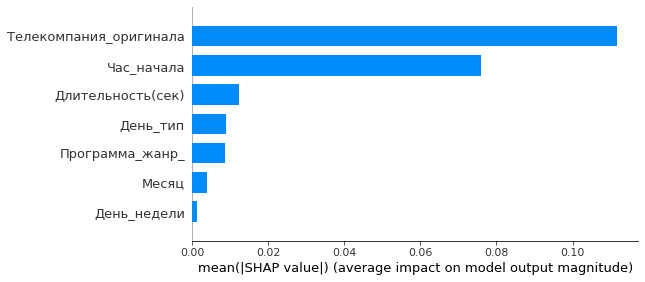

In [70]:
explainer = shap.TreeExplainer(catmodel, feature_dependence="interventional")
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

Наибольшее влияние на рейтинг оказывает телекомпания и час начала передачи. Остальные факторы имеют значительно меньший вес

Как мы видим, наибольшее влияние оказывает телекаомпания, для которых очень отличаются рейтинги. Попробуем оптимизировать изначальную модель, построив ее для конкретного канала.

 **3 вариант оптимизации - поканальный**

Рассмотрим вариант для 1 канала

In [71]:
TVR_file_1channel = TVR_file[TVR_file['Телекомпания_оригинала'] == 'ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ)']


In [72]:
vibros_TVR_90 = TVR_file_1channel['TVR'].quantile(0.9)
vibros_TVR_10 = TVR_file_1channel['TVR'].quantile(0.1)
TVR_file_vibros_10_90 = TVR_file_1channel[(TVR_file_1channel['TVR']<= vibros_TVR_90) & (TVR_file_1channel['TVR']>= vibros_TVR_10)] 


TVR_file_CB = TVR_file_vibros_10_90 

X = TVR_file_CB.loc[:,["Длительность(сек)", 'Программа_жанр_','Месяц','Телекомпания_оригинала','День_недели','Час_начала','День_тип']]
y = TVR_file_CB['TVR']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 123)

categorical_features_indices = np.where(X.dtypes != np.int)[0]
categorical_features_indices = list(categorical_features_indices)

train_weights = 1/y_train
train_dataset = Pool(data=X_train,
                     label=y_train,
                     cat_features=categorical_features_indices, weight = train_weights)

eval_dataset = Pool(data=X_test,
                    label=y_test,
                    cat_features=categorical_features_indices)

catmodel=CatBoostRegressor(iterations=100, depth=10, learning_rate=0.7)
catmodel.fit(train_dataset,  eval_set=eval_dataset)

y_true = y_test.values
y_pred = catmodel.predict(eval_dataset)

print("MSE: ", MSE(y_true,y_pred ))
print("MAPE: ", MAPE(y_true,y_pred))

0:	learn: 0.3163782	test: 0.5288004	best: 0.5288004 (0)	total: 25.1ms	remaining: 2.48s
1:	learn: 0.2477531	test: 0.4036254	best: 0.4036254 (1)	total: 45.3ms	remaining: 2.22s
2:	learn: 0.2240633	test: 0.3606835	best: 0.3606835 (2)	total: 62.6ms	remaining: 2.02s
3:	learn: 0.2059471	test: 0.3243485	best: 0.3243485 (3)	total: 85ms	remaining: 2.04s
4:	learn: 0.2002000	test: 0.3122188	best: 0.3122188 (4)	total: 106ms	remaining: 2s
5:	learn: 0.1967880	test: 0.3075782	best: 0.3075782 (5)	total: 127ms	remaining: 1.98s
6:	learn: 0.1922854	test: 0.3016607	best: 0.3016607 (6)	total: 147ms	remaining: 1.95s
7:	learn: 0.1917603	test: 0.3008941	best: 0.3008941 (7)	total: 154ms	remaining: 1.77s
8:	learn: 0.1896575	test: 0.2964093	best: 0.2964093 (8)	total: 174ms	remaining: 1.76s
9:	learn: 0.1886597	test: 0.2939574	best: 0.2939574 (9)	total: 194ms	remaining: 1.75s
10:	learn: 0.1853486	test: 0.2890948	best: 0.2890948 (10)	total: 215ms	remaining: 1.74s
11:	learn: 0.1853481	test: 0.2890430	best: 0.2890430 

Как мы видим, наибольшее улучшение ошибки дает поканальный регрессионный анализ. Ошибка значительно уменьшилась.  